<a href="https://colab.research.google.com/github/varunraisinghal/CSE151A-MachineLearningFinalProject/blob/main/CSE151A_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Final Project

### Team Members

| Name    | Email Address      | Major                  | Pronouns |
|---------|--------------------|------------------------|----------|
| Amit    | anamburi@ucsd.edu  | Computer Science       | He/him   |
| Varun   | vsinghal@ucsd.edu  | Computer Science       | He/Him   |
| Eric    | e7tran@ucsd.edu    | Computer Science       | He/Him   |
| Brian   | bwlee@ucsd.edu     | ECE Computer Engineering | N/A    |
| Thomas  | tjoel@ucsd.edu     | Computer Science       | He/him   |
| Jason   | jsliang@ucsd.edu   | Computer Engineering   | He/him   |
| Desiree | dalcanta@ucsd.edu  | Computer Science       | She/her  |
| Tian   | xxxx@ucsd.edu    | Computer Science       | He/him   |


# Milestone 2: Data Exploration & Initial Preprocessing

### Dataset Overview

The Spotify 2023 dataset contains information about tracks on Spotify for the year 2023, including various metrics and features that describe the musical and popularity characteristics of each track.

- **Total Entries:** 953 tracks
- **Columns:** 24

### Key Columns

- `track_name`: The name of the track.
- `artist(s)_name`: The artist(s) name for the track.
- `artist_count`: The number of artists for each track.
- `released_year`, `released_month`, `released_day`: Release date information.
- `in_spotify_playlists`, `in_spotify_charts`, `streams`: Spotify-related metrics.
- `in_apple_playlists`, `in_apple_charts`, `in_deezer_playlists`, `in_deezer_charts`: Metrics related to other streaming platforms.
- `bpm`: Beats per minute, indicating the tempo of the track.
- `key`, `mode`: Musical key and mode of the track.
- Various metrics in percentages (`danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, `speechiness_%`): Features representing the musical characteristics of each track.

### Observations

- Some columns have missing values (`in_shazam_charts`, `key`), which may require data imputation depending on the analysis or model building.
- Some columns are the wrong type (`in_shazam_charts`, `streams`), which will require erroneous data to be corrected and the feature colummns to be typecasted.
- The dataset contains a wide range of musical characteristics, indicating a diverse set of tracks.

### Analysis Steps

1. **Handling Missing Values:** Determine the best strategy for dealing with missing data (e.g., imputation, removal).
2. **Categorical Data Analysis:** Explore the distributions of categorical variables such as `artist(s)_name`, `key`, `mode`.
3. **Numerical Data Analysis:** Investigate the distributions of numerical features, identify any outliers, and understand the spread of data.
4. **Correlations:** Examine the relationships between numerical features, especially how different musical characteristics correlate with each other and with popularity metrics like streams and chart positions.
5. **Visualization:** Create various visualizations (histograms, scatter plots, box plots) to better understand the data distribution and the relationships between different variables.

Analysis of Spotify 2023 dataset provides insights into the musical and popularity dynamics of tracks on Spotify. This analysis can help identify trends, preferences, and the impact of various musical features on popularity metrics.

### Imports

In [392]:
# pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# sklearn imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# keras and tensorflow
import tensorflow as tf
import keras
from keras import layers
from scikeras.wrappers import KerasRegressor

# colorblind friendly palette
COLORS = ['#1E88E5', '#D81B60', '#FFC107']
ALPHA = [0.5, 0.8]

### Loading Dataset


In [393]:
# download dataset
# !wget https://raw.githubusercontent.com/varunraisinghal/CSE151A-MachineLearningFinalProject/main/spotify-2023.csv

# read in dataset
spotify_data = pd.read_csv('spotify-2023.csv', encoding = 'latin1', thousands = ',')

# look at the dataframe
spotify_data

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
0                  147  141381703                  43  ...  125    B  Major   
1                   48  133716286                  48  ...   92   C#  Major   
2                  113  140003974                  94  ...  138    F  Major   
3                  100  800840817                 116  ...  170    A  Major   
4                   50  303236322                  84  ...  144    A  Minor   
..                 ...        ...                 ...  ...  ...  ...    ...   
948                  0   91473363                  61  ...  144    A  Major   
949                  0  121871870                   4  ...  166   F#  Major   
950                  0   73513683                   2  ...   92   C#  Major   
951                  0  133895612                  29  ...   97   C#  Major   
952                  2   96007391                  27  ...   90    E  Minor   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0                80         89       83             31                   0   
1                71         61       74              7                   0   
2                51         32       53             17                   0   
3                55         58       72             11                   0   
4                65         23       80             14                  63   
..              ...        ...      ...            ...                 ...   
948              60         24       39             57                   0   
949              42          7       24             83                   1   
950              80         81       67              4                   0   
951              82         67       77              8                   0   
952              61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8      

In [394]:
# look at the datatypes
spotify_data.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

Ideally the datatypes should be either of `object` type for string features like `artist(s)_name`, or `int64` for numeric features. \
Attributes that should be `int64` like `in_shazam_charts` and `streams` likely have NaN (floats) or erroneous data, so we need to fix those.

### Preprocessing Data

In [395]:
# check which attributes have null values
missing_values = spotify_data.isnull().sum()
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [396]:
# impute shazam charts as 0 if null (meaning 0 streams in shazam charts)
spotify_data['in_shazam_charts'].fillna(value = 0, inplace = True)

# change the datatype to int64
spotify_data['in_shazam_charts'] = spotify_data['in_shazam_charts'].astype(np.int64)

# dropping key and mode for now as it doesn't help that much
spotify_data.drop(['key', 'mode'], axis = 1, inplace = True)

In [397]:
# see if the streams column can be typecast into np.int64, print error if not
for i, row in spotify_data.iterrows():
    try:
        np.int64(row['streams'])
    except Exception as error:
        print(error)

# remove the faulty row
spotify_data.drop(spotify_data[spotify_data['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index, inplace = True)

# convert the streams column to int64
spotify_data['streams'] = spotify_data['streams'].astype(np.int64)

invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'


In [398]:
# consolidate playlist counts into one total metric
in_total_playlists = (spotify_data['in_spotify_playlists'] + spotify_data['in_apple_playlists'] + spotify_data['in_deezer_playlists']).rename('in_total_playlists')

# drop old playlist count columns IF NEEDED
# spotify_data = spotify_data.drop(columns=['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'])

# add the new feature to the dataset
spotify_data = pd.concat([spotify_data, in_total_playlists.to_frame()], axis=1)
spotify_data.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  in_shazam_charts  \
0                147  141381703                  43  ...               826   
1                 48  133716286                  48  ...               382   
2                113  140003974                  94  ...               949   
3                100  800840817                 116  ...               548   
4                 50  303236322                  84  ...               425   

   bpm  danceability_%  valence_%  energy_%  acousticness_%  \
0  125              80         89        83              31   
1   92              71         61        74               7   
2  138              51         32        53              17   
3  170              55         58        72              11   
4  144              65         23        80              14   

   instrumentalness_%  liveness_%  speechiness_%  in_total_playlists  
0                   0           8              4                 641  
1                   0          10              4                1580  
2                   0          31              6                1582  
3                   0          11             15                8099  
4                  63          11              6                3304  

[5 rows x 23 columns]

In [399]:
# look at the datatypes
spotify_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
in_total_playlists       int64
dtype: object

In [400]:
# look at aggregate data
spotify_data.describe()

artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000  1.416362e+08   
50%             2216.500000           3.000000  2.905309e+08   
75%             5573.750000          16.000000  6.738690e+08   
max            52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  ...  \
count          952.000000       952.000000           952.000000  ...   
mean            67.866597        51.963235           385.535714  ...   
std             86.470591        50.628850          1131.078760  ...   
min              0.000000         0.000000             0.000000  ...   
25%             13.000000         7.000000            13.000000  ...   
50%             34.000000        38.500000            44.000000  ...   
75%             88.000000        87.000000           164.250000  ...   
max            672.000000       275.000000         12367.000000  ...   

       in_shazam_charts         bpm  danceability_%   valence_%    energy_%  \
count        952.000000  952.000000      952.000000  952.000000  952.000000   
mean          56.907563  122.553571       66.984244   51.406513   64.274160   
std          157.513706   28.069601       14.631282   23.480526   16.558517   
min            0.000000   65.000000       23.000000    4.000000    9.000000   
25%            0.000000   99.750000       57.000000   32.000000   53.000000   
50%            2.000000  121.000000       69.000000   51.000000   66.000000   
75%           33.250000  140.250000       78.000000   70.000000   77.000000   
max         1451.000000  206.000000       96.000000   97.000000   97.000000   

       acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
count      952.000000          952.000000  952.000000     952.000000   
mean        27.078782            1.582983   18.214286      10.138655   
std         26.001599            8.414064   13.718374       9.915399   
min          0.000000            0.000000    3.000000       2.000000   
25%          6.000000            0.000000   10.000000       4.000000   
50%         18.000000            0.000000   12.000000       6.000000   
75%         43.000000            0.000000   24.000000      11.000000   
max         97.000000           91.000000   97.000000      64.000000   

       in_total_playlists  
count          952.000000  
mean          5655.967437  
std           8919.088432  
min             34.000000  
25%            914.500000  
50%           2306.000000  
75%           5995.250000  
max          62623.000000  

[8 rows x 21 columns]

### Histograms Distribution Pattern

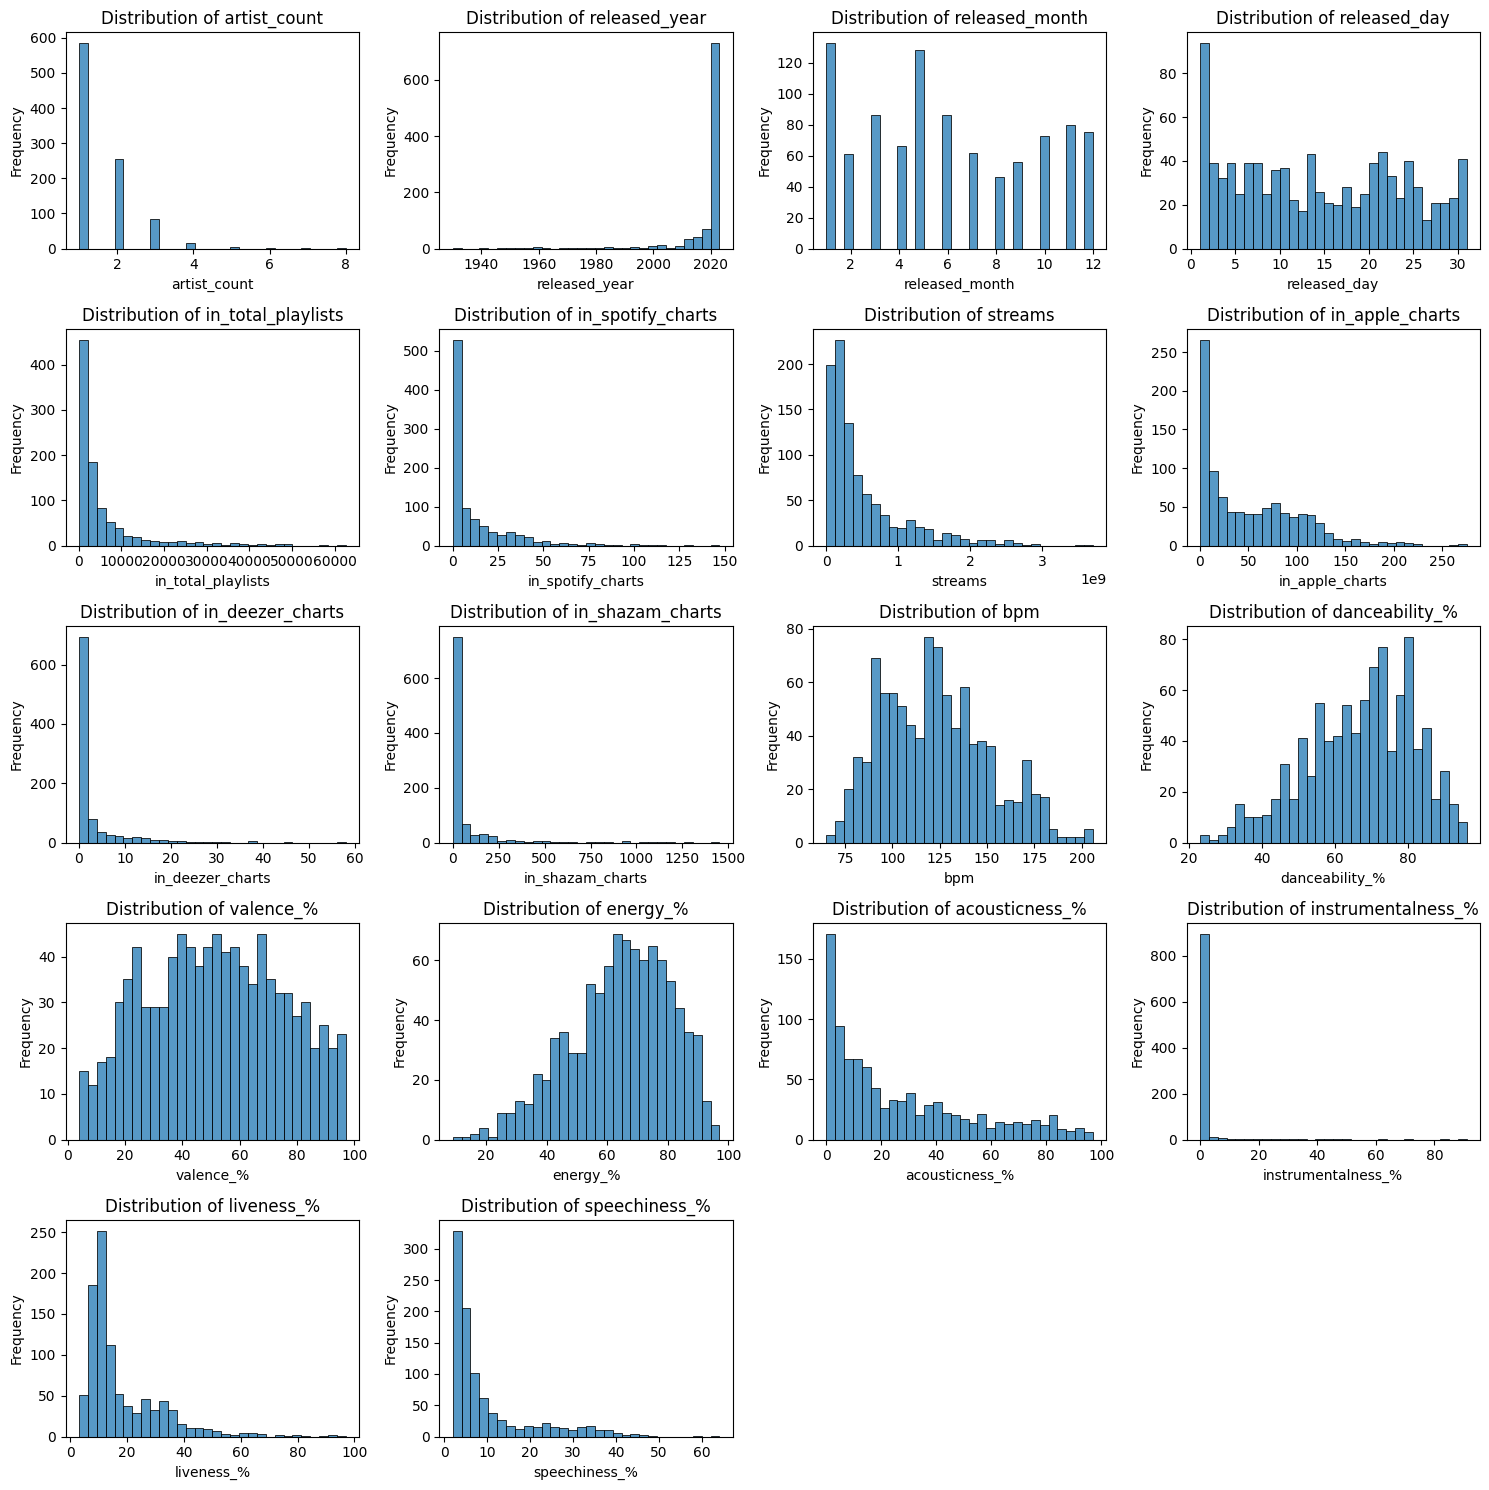

In [401]:
# all numerical features
numeric_features = [
    'artist_count', 	'released_year', 	'released_month', 	'released_day', 	'in_total_playlists',
    'in_spotify_charts', 	'streams', 	'in_apple_charts',
    'in_deezer_charts', 	'in_shazam_charts', 	'bpm', 	'danceability_%', 	'valence_%', 	'energy_%',
    'acousticness_%', 	'instrumentalness_%', 	'liveness_%', 	'speechiness_%'
]

# create subplots
num_rows = -(-len(numeric_features) // 4)
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

# plot the feature histograms
for i, feature in enumerate(numeric_features):
    sns.histplot(spotify_data[feature], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for ax in axes[len(numeric_features):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


### Correlation Heatmap

In [402]:
# generate correlation between all numerical features and 'in_total_playlists'
numeric_corr = spotify_data[numeric_features].corrwith(spotify_data['in_total_playlists'])
numeric_corr

artist_count         -0.100118
released_year        -0.393610
released_month       -0.104530
released_day         -0.081583
in_total_playlists    1.000000
in_spotify_charts     0.158892
streams               0.783039
in_apple_charts       0.266219
in_deezer_charts      0.139775
in_shazam_charts      0.060166
bpm                  -0.021766
danceability_%       -0.104049
valence_%            -0.020281
energy_%              0.038781
acousticness_%       -0.065964
instrumentalness_%   -0.027693
liveness_%           -0.045270
speechiness_%        -0.088687
dtype: float64

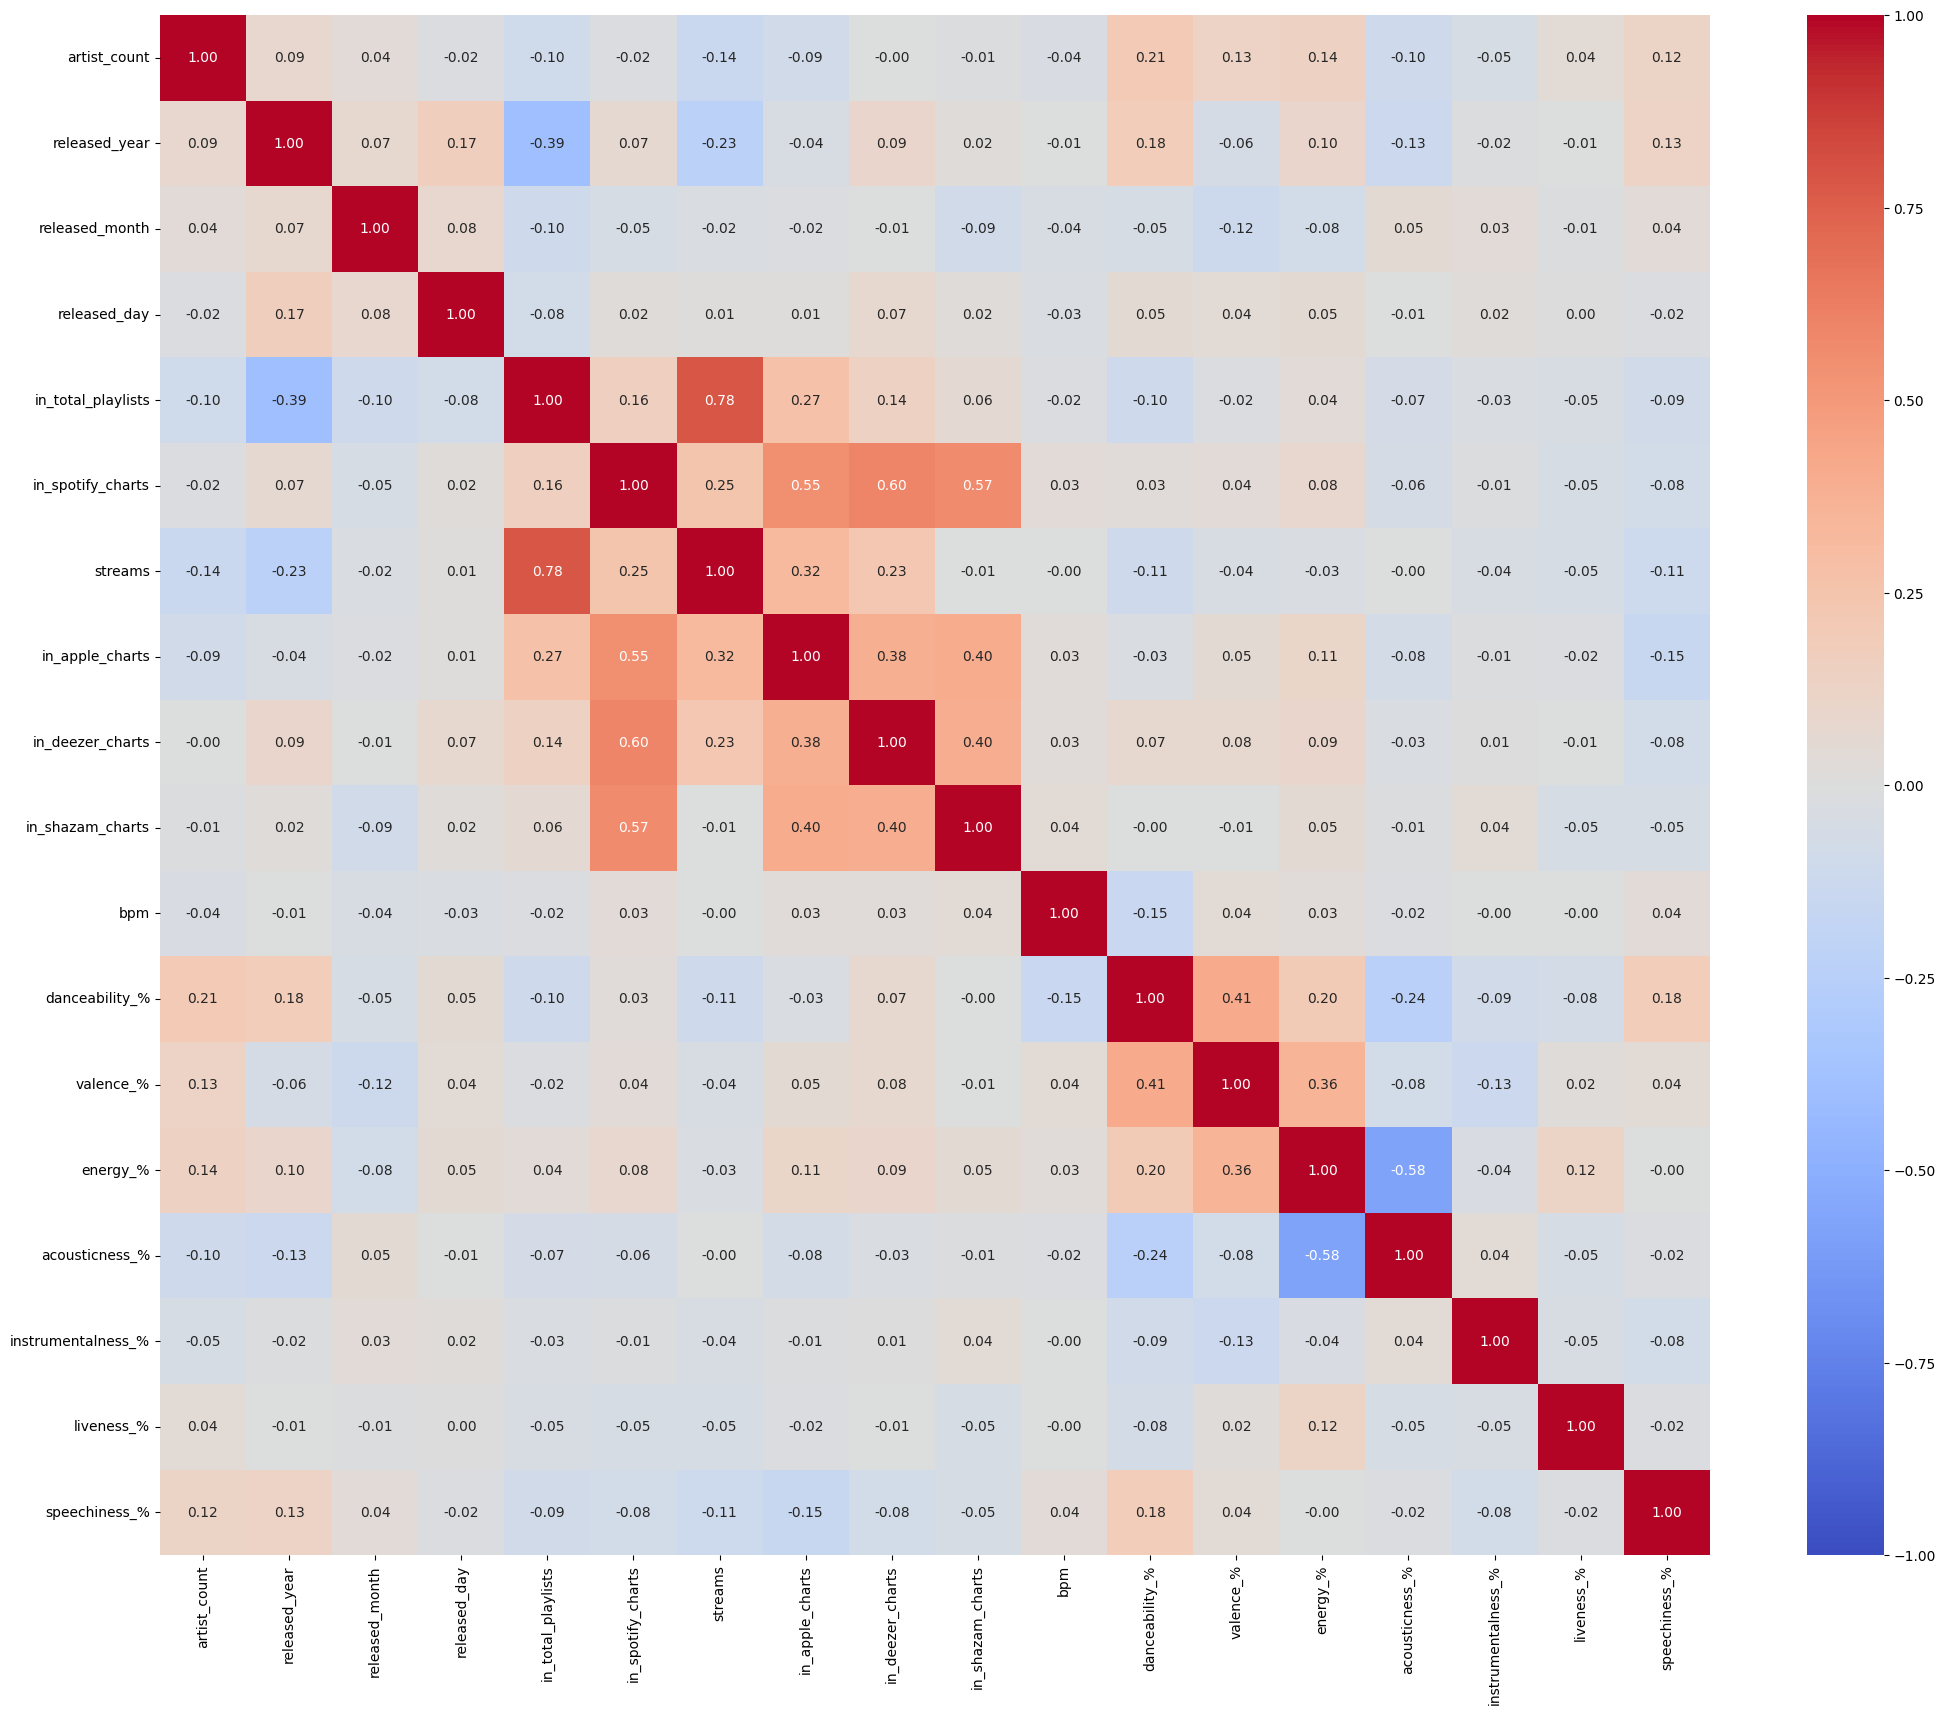

In [403]:
# generate heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(spotify_data[numeric_features].corr(), vmin = -1, vmax = 1, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The 3 features with the highest linear correlation with in_total_playlists that are not also in_X_playlists features are streams (0.783039), released_year (-0.393610), and in_apple_charts (0.266219).

In [404]:
# get top feature names
top_3_features = ['streams', 'released_year', 'in_apple_charts']

top_2_features = ['streams', 'released_year']

top_feature = ['streams']

all_features = [
    'artist_count', 'released_year', 'released_month', 'released_day', 
    'in_spotify_charts', 'streams', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts', 
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
    'liveness_%', 'speechiness_%'
]

### Pairplots

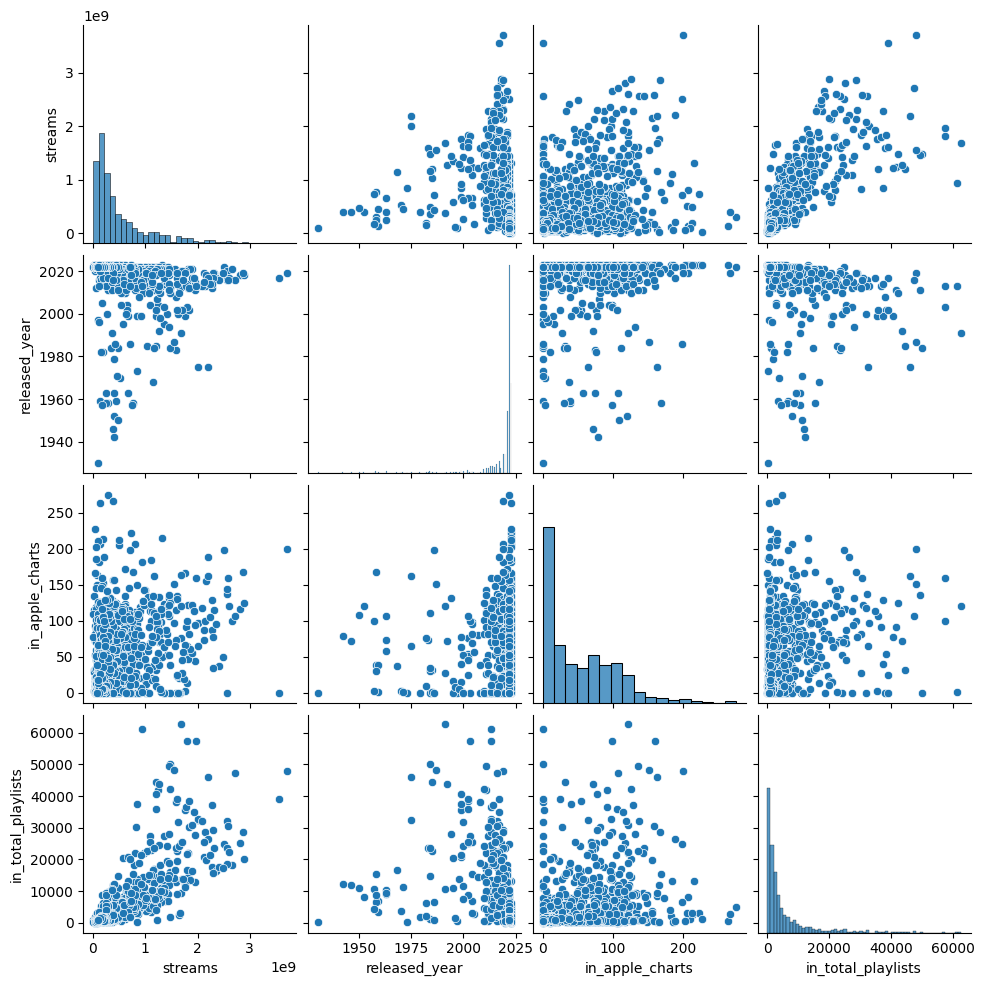

In [405]:
# generate pairplot to see trends between features
sns.pairplot(spotify_data[top_3_features + ['in_total_playlists']])
plt.show()

### Helper Functions

In [406]:
# two scatterplots showcasing y and yhat, as well as the difference
def plot_scatter(y, yhat, out_feature, title):
    # subplot for testing data
    fig, axes = plt.subplots(1, 2, figsize = (15, 4))

    # plot y, yhat, ydiff
    sns.scatterplot(np.array(y), label='y', ax=axes[0], color = COLORS[0], linewidth = 0)
    sns.scatterplot(yhat, label = 'yhat', ax=axes[0], color = COLORS[1], linewidth = 0, alpha = ALPHA[0])
    sns.scatterplot(yhat - np.array(y), label='yhat - y', ax=axes[1], color = COLORS[2], linewidth = 0, alpha = ALPHA[1])

    # add labels to axes
    axes[0].set(xlabel='Observation #', ylabel=out_feature)
    axes[1].set(xlabel='Observation #')

    # set super title and show
    fig.suptitle('Output Comparison (' + title + ' Data)')
    plt.show()

In [407]:
# plots the model fit graph for each input feature (may not be a line because we have multiple input features)
def plot_fit_graph(X, y, yhat, in_features, title):
    fig, axes = plt.subplots(-(-len(in_features) // 3), min(len(in_features), 3), figsize = (min(5 * len(in_features), 15), -(-len(in_features) // 3) * 4))

    # conditionals because indexing axes changes based on dimensions
    if (len(in_features) == 1):
        # plot y, yhat
        axes.scatter(X[in_features[0]], y, label = 'y', color = COLORS[0])
        axes.scatter(X[in_features[0]], yhat, label = 'yhat', color = COLORS[1], alpha = ALPHA[0])

        # show axes labels and legend
        axes.set_xlabel(in_features[0])
        axes.set_ylabel('in_total_playlists')
        axes.legend()

    elif (len(in_features) > 3):
        for i in range(len(in_features)):
            # plot y, yhat
            axes[int(i / 3)][i % 3].scatter(X[in_features[i]], y, label = 'y', color = COLORS[0])
            axes[int(i / 3)][i % 3].scatter(X[in_features[i]], yhat, label = 'yhat', color = COLORS[1], alpha = ALPHA[0])

            # show axes labels and legend
            axes[int(i / 3)][i % 3].set_xlabel(in_features[i])
            axes[int(i / 3)][0].set_ylabel('in_total_playlists')
            axes[int(i / 3)][i % 3].legend()

        # hide unused plots
        i += 1
        
        while i % 3 != 0:
            print(i)
            axes[int(i / 3)][i % 3].set_visible(False)
            i += 1

    else:
        for i in range(len(in_features)):
            # plot y, yhat
            axes[i].scatter(X[in_features[i]], y, label = 'y', color = COLORS[0])
            axes[i].scatter(X[in_features[i]], yhat, label = 'yhat', color = COLORS[1], alpha = ALPHA[0])

            # show axes labels and legend
            axes[i].set_xlabel(in_features[i])
            axes[i].legend()

        # set y label for row
        axes[0].set_ylabel('in_total_playlists')

    # set super title and show
    fig.suptitle('Model Results (' + title + ' Data)')
    plt.show()

In [408]:
# partial dependence plots to show each input feature's contribution to the output feature
def plot_partial_dep(model, X, y, in_features, title):
    # roughly viewing each input features contribution to the output feature on training data
    PDD = PartialDependenceDisplay.from_estimator(model, X, features = in_features)

    for i in range(len(in_features)):
        # plot y
        PDD.axes_[int(i / 3)][i % 3].scatter(X[in_features[i]], y, color = COLORS[0], label = 'y')

        # show axes labels and legend
        PDD.axes_[int(i / 3)][0].set_ylabel('in_total_playlists')
        PDD.axes_[int(i / 3)][i % 3].legend()

        # set line legend manually
        handles, labels = PDD.axes_[int(i / 3)][i % 3].get_legend_handles_labels()
        handles.extend([Line2D([0], [0], label='partial dependence', color=COLORS[1])])
        PDD.axes_[int(i / 3)][i % 3].legend(handles = handles)

        # set line color manually
        PDD.axes_[int(i / 3)][i % 3].get_lines()[0].set_color(COLORS[1])

    # set figure height and width
    PDD.figure_.set_figwidth(min(5 * len(in_features), 15))
    PDD.figure_.set_figheight(-(-len(in_features) // 3) * 4)

    # set super title and show
    plt.suptitle('Partial Dependence Plots (' + title + ' Data)')
    plt.show()

# Model 1 - Linear Regression Model

### Using Top 3 Correlating Features

Training MSE: 26553571.211171925
Testing MSE: 28284218.52871145


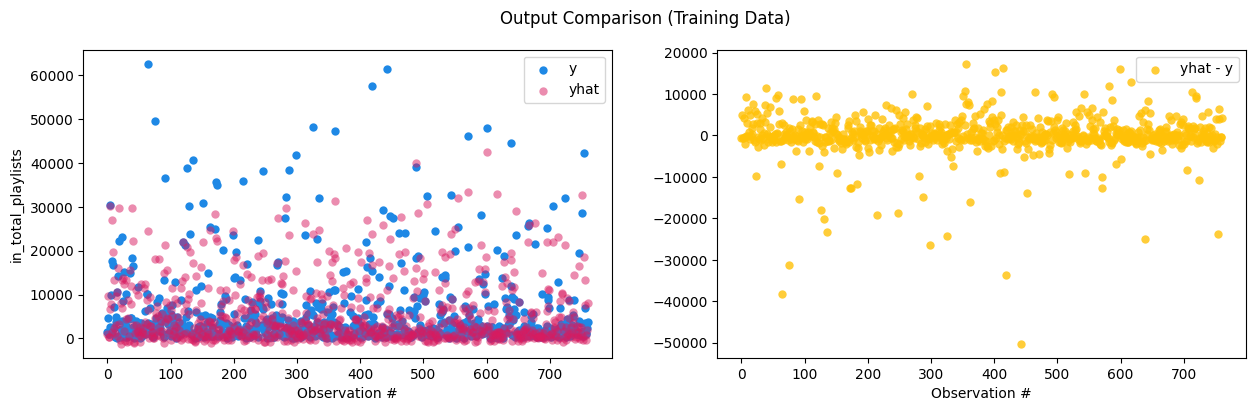

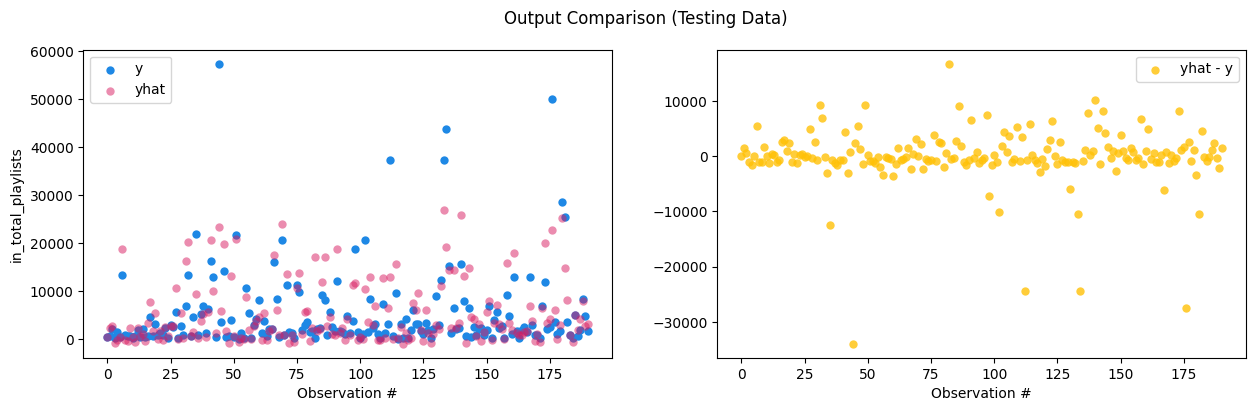

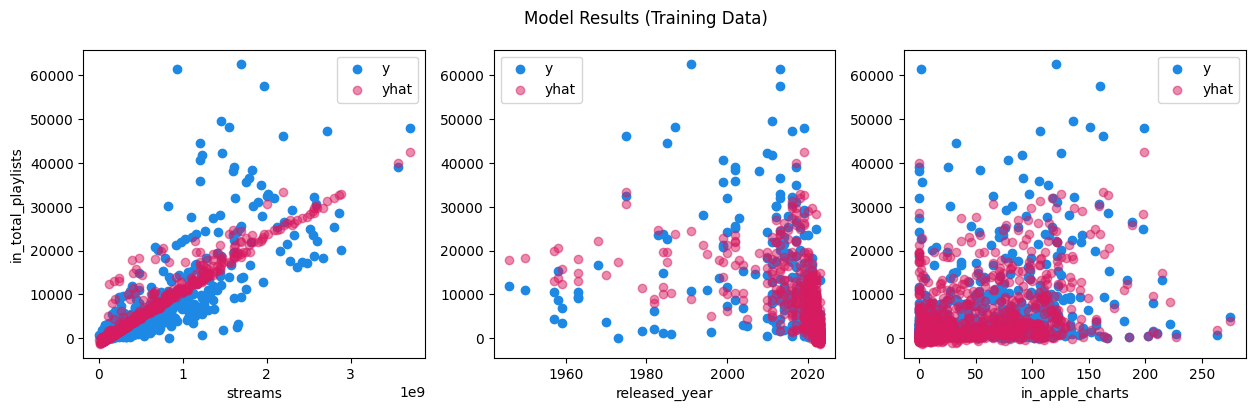

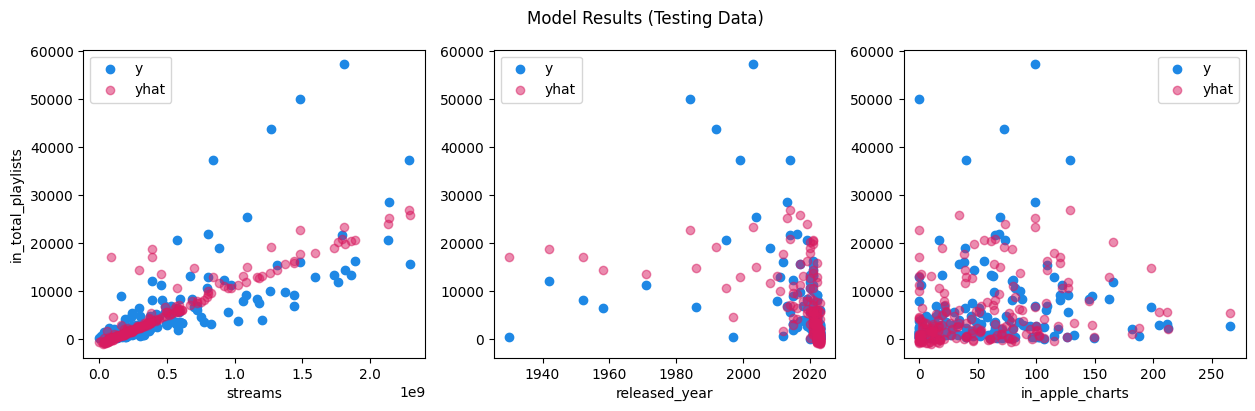

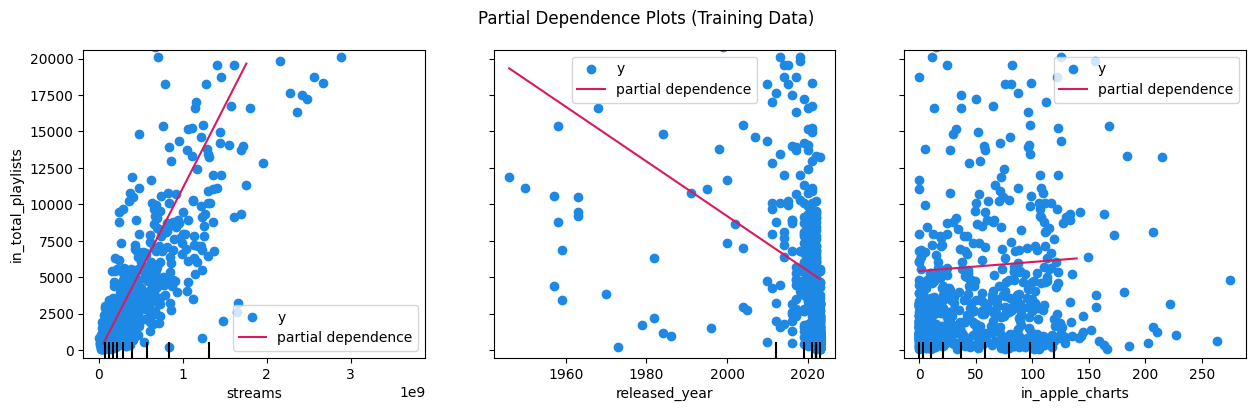

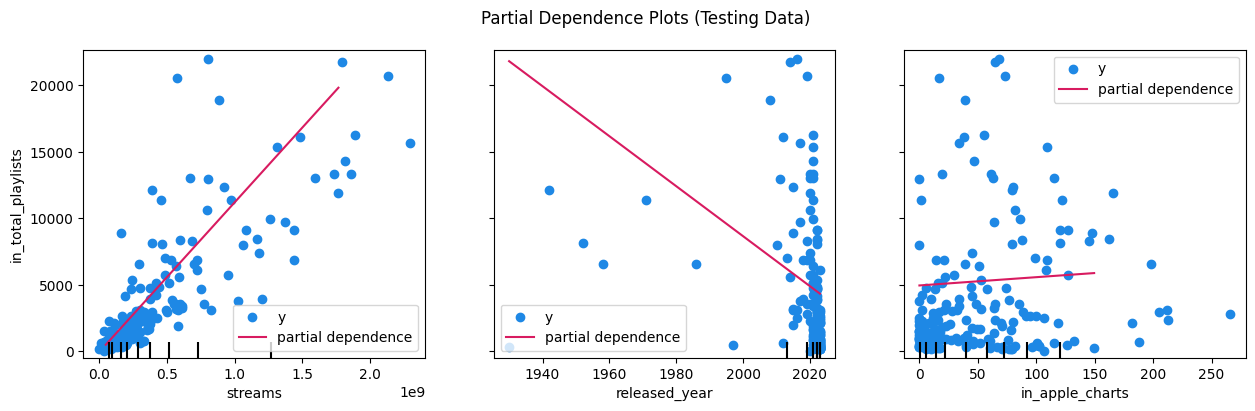

In [442]:
def m1_linear_regression(data, in_features, out_feature):
    # train test split with 80% train 20% test using input features
    X_train, X_test, y_train, y_test = train_test_split(data[in_features], data[out_feature], test_size=0.20)

    # train the model
    lin_reg = LinearRegression().fit(X_train, y_train)

    # get yhat for training and testing data
    yhat_train = lin_reg.predict(X_train)
    yhat_test = lin_reg.predict(X_test)

    # display MSE
    print("Training MSE:", mean_squared_error(y_train, yhat_train))
    print("Testing MSE:", mean_squared_error(y_test, yhat_test))

    # plot scatterplots for y and yhat
    plot_scatter(y_train, yhat_train, out_feature, 'Training')
    plot_scatter(y_test, yhat_test, out_feature, 'Testing')

    # plot regression results for each feature compared to output
    plot_fit_graph(X_train, y_train, yhat_train, in_features, 'Training')
    plot_fit_graph(X_test, y_test, yhat_test, in_features, 'Testing')

    # plot partial dependence plots
    plot_partial_dep(lin_reg, X_train, y_train, in_features, 'Training')
    plot_partial_dep(lin_reg, X_test, y_test, in_features, 'Testing')
    
m1_linear_regression(spotify_data, top_3_features, 'in_total_playlists')

# Linear Regression for other sets of features, can run if you want
# m1_linear_regression(spotify_data, top_2_features, 'in_total_playlists')
# m1_linear_regression(spotify_data, top_feature, 'in_total_playlists')
# m1_linear_regression(spotify_data, all_features, 'in_total_playlists')

# Model 2 - DFFNN with RELU activation function - All Numerical Features

## Model Without K-Fold Cross Validation

In [432]:
#Run Preprocessing Section Before Running This
X = pd.DataFrame(MinMaxScaler().fit_transform(spotify_data[all_features]), columns = all_features)
y = spotify_data['in_total_playlists']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Build Model Using TF Keras

In [433]:
activationMethod = "relu"

model = keras.Sequential()
model.add(keras.Input(shape=(17,)))
model.add(layers.Dense(17, activation=activationMethod, name="layer1"))
model.add(layers.Dense(34, activation=activationMethod, name="layer2"))
model.add(layers.Dense(34, activation=activationMethod, name="layer3"))
model.add(layers.Dense(17, activation=activationMethod, name="layer4"))
model.add(layers.Dense(1, activation=activationMethod, name="output"))

Optimizer, Early Stopping, Checkpoint


In [434]:
metrics = ["mean_squared_error"]
loss_type = "mean_squared_error"

lr_static = 0.001

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9) #Found on the keras.io/api/optimizers page as an example of dynamic leraning rate

opt = keras.optimizers.Adam(
    learning_rate=lr_static
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    #Enter your parameters
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=100
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    #Enter your paramaters
    filepath="./modelCheckpoints",
    monitor='val_loss',
    verbose = 0,
    save_best_only = False,
    save_weights_only = False,
    mode = 'auto',
    save_freq = 'epoch',
    options = None,
    initial_value_threshold = None
)

Compile and Fit Model

In [435]:
batch_size=100
epochs=1000

model.compile(optimizer=opt, loss=loss_type, metrics=metrics)

kr_model = KerasRegressor(model, loss = loss_type, metrics = metrics)

history = kr_model.fit(X_train.astype('float'), y_train, validation_split=0.1, callbacks = [early_stopping], batch_size=batch_size, epochs=epochs, verbose=0)

In [436]:
yhat_train = kr_model.predict(X_train, verbose=0)
yhat_test = kr_model.predict(X_test, verbose=0)

train_mse = mean_squared_error(y_train, yhat_train)
test_mse = mean_squared_error(y_test, yhat_test)

print("Training MSE: " + str(train_mse))
print("Test MSE: " + str(test_mse))

Training MSE: 8071914.120941014
Test MSE: 34874413.61805446


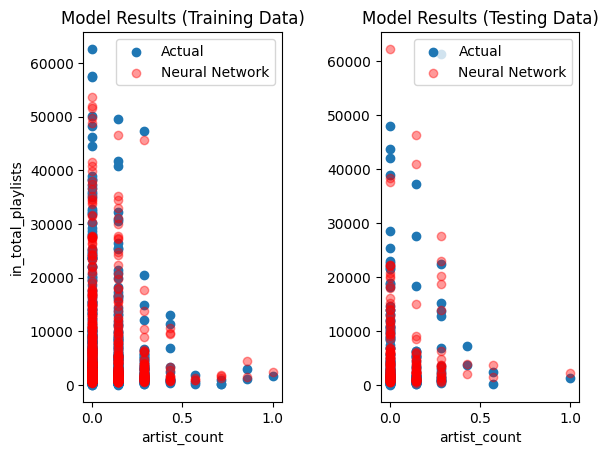

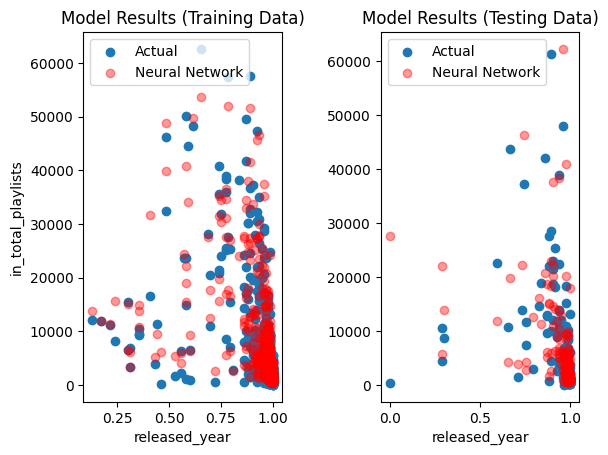

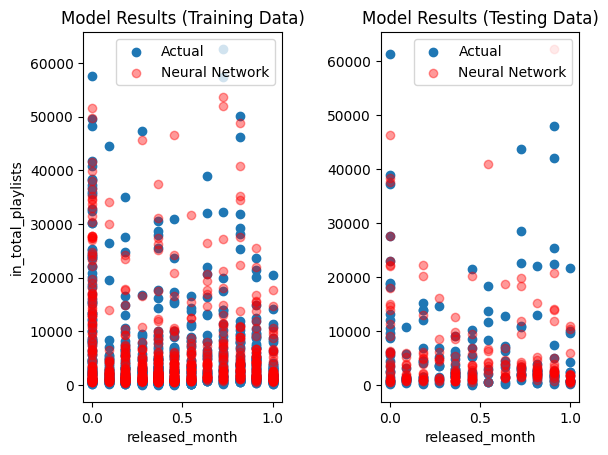

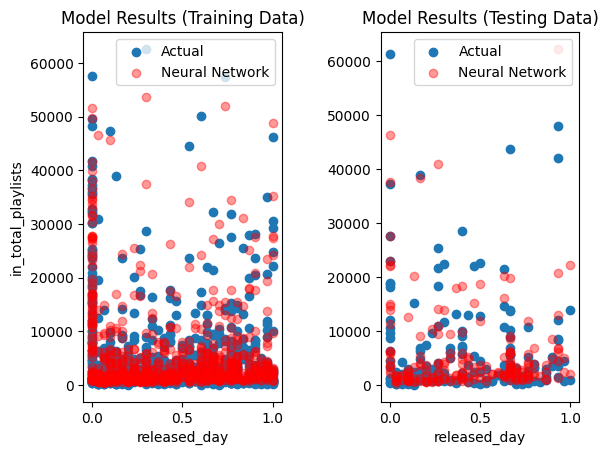

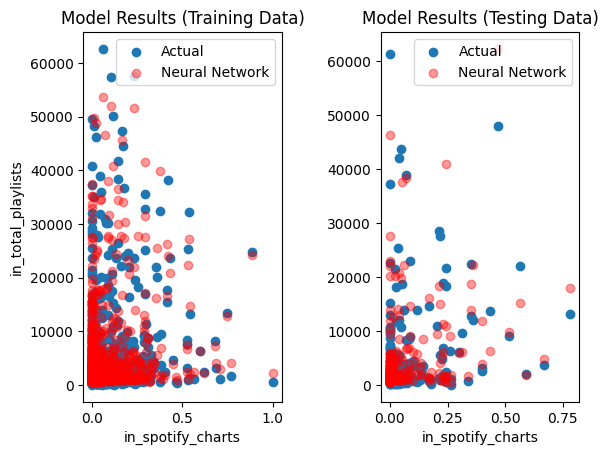

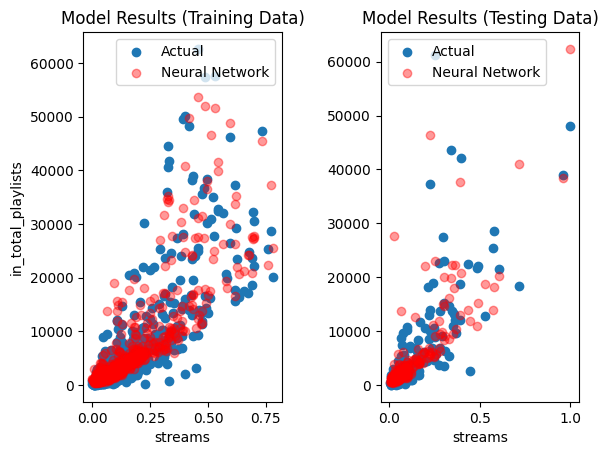

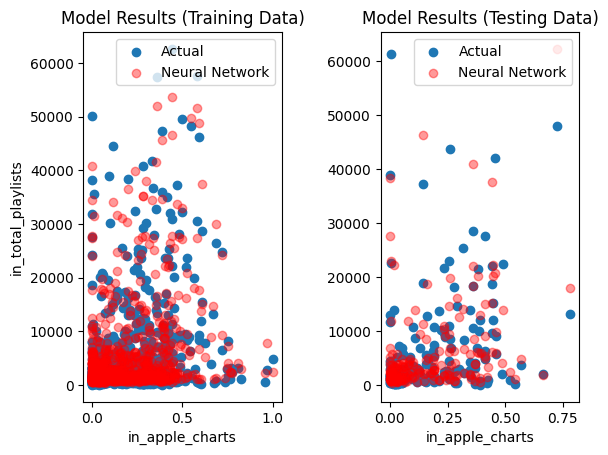

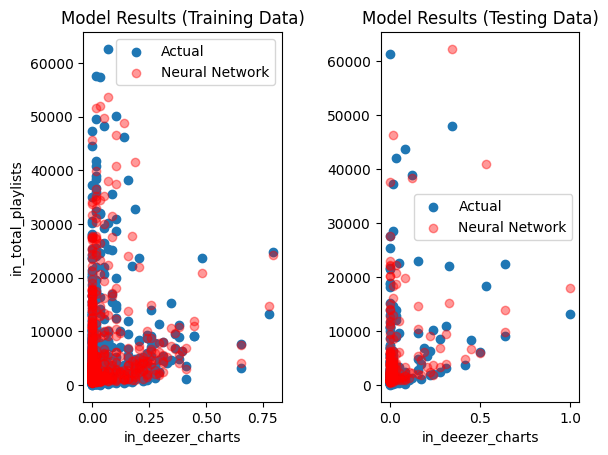

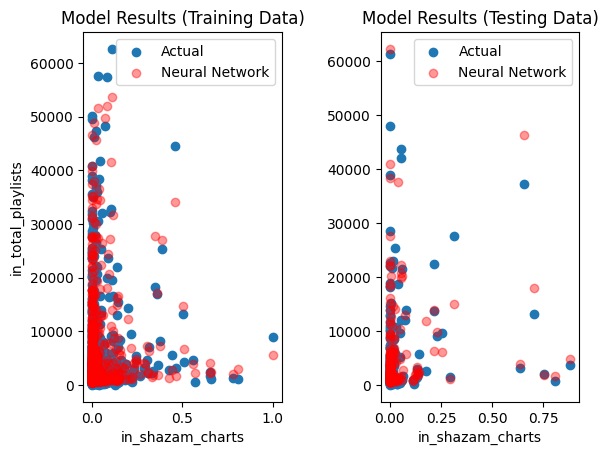

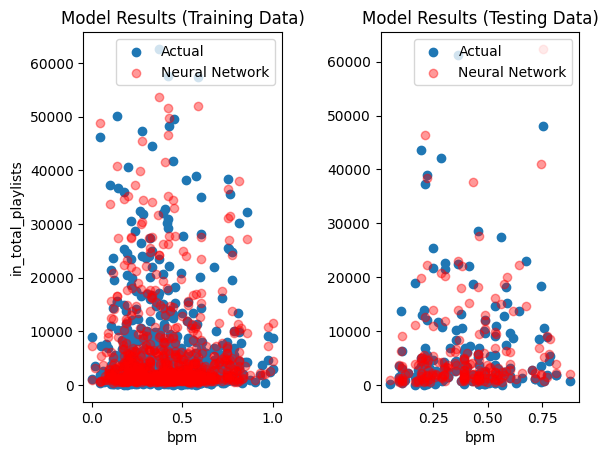

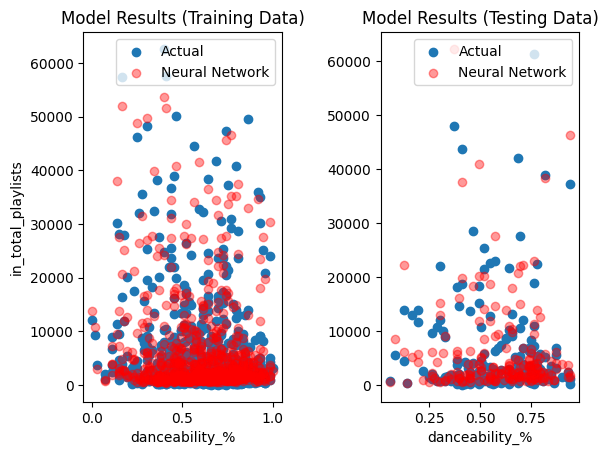

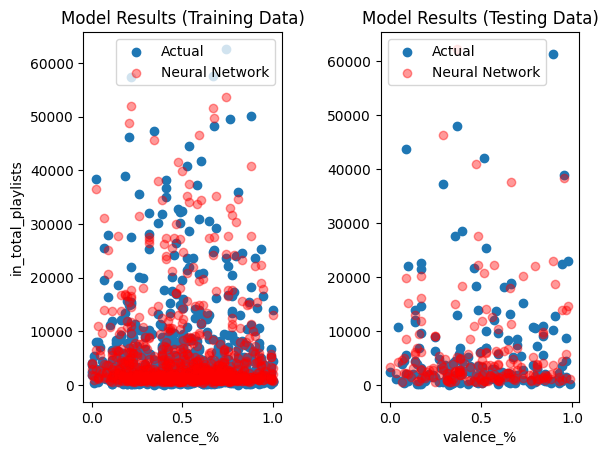

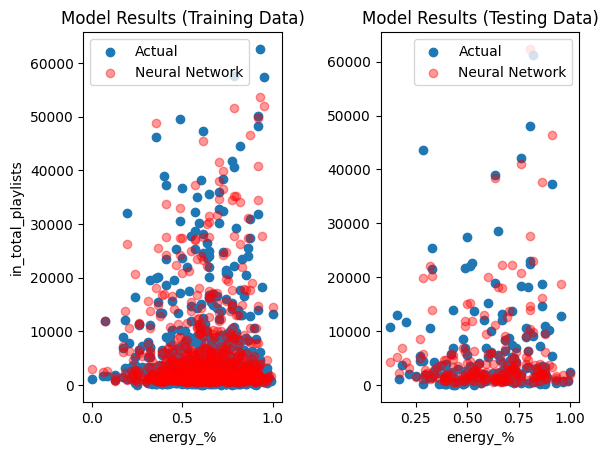

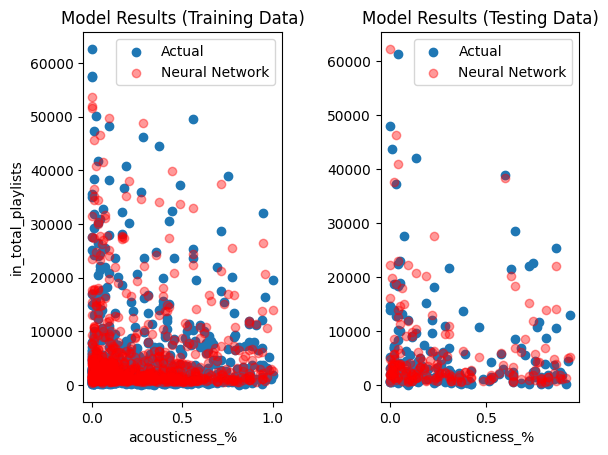

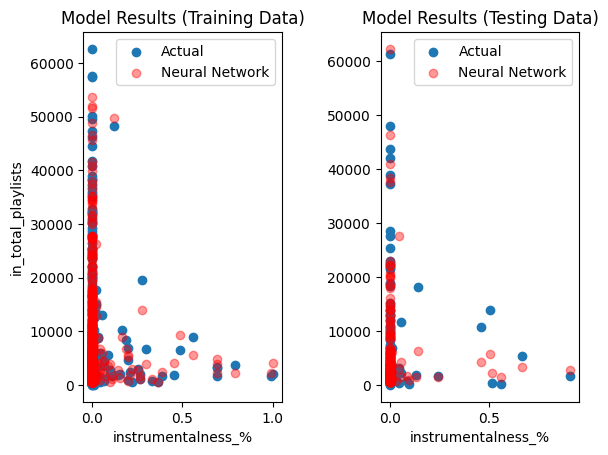

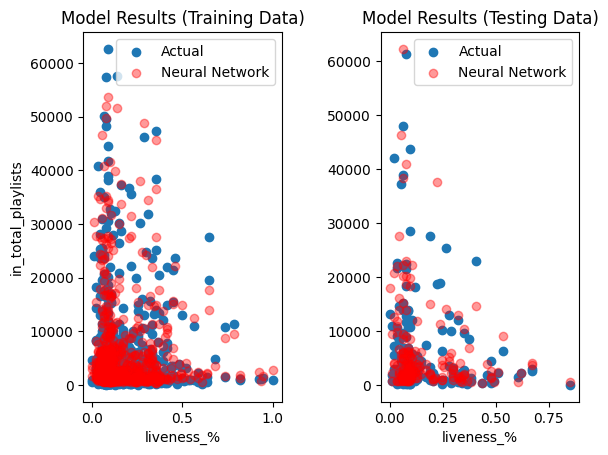

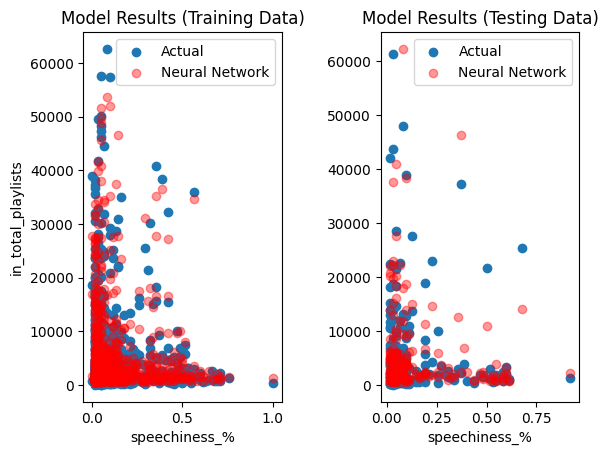

In [437]:
for feature in all_features:
   fig, axes = plt.subplots(1, 2)

   # ploting training data with the regression
   axes[0].scatter(X_train[feature], y_train, label = 'Actual')
   axes[0].scatter(X_train[feature], yhat_train, color = 'red', label = 'Neural Network', alpha = 0.4)
   axes[0].set_xlabel(feature)
   axes[0].set_ylabel('in_total_playlists')
   axes[0].set_title('Model Results (Training Data)')
   axes[0].legend()

   # ploting training data with the regression
   axes[1].scatter(X_test[feature], y_test, label = 'Actual')
   axes[1].scatter(X_test[feature], yhat_test, color = 'red', label = 'Neural Network', alpha = 0.4)
   axes[1].set_xlabel(feature)
   axes[1].set_title('Model Results (Testing Data)')
   axes[1].legend()

   plt.subplots_adjust(wspace = 0.5)

   plt.show()

24/24 [==============================] - 0s 702us/step


24/24 [==============================] - 0s 578us/step


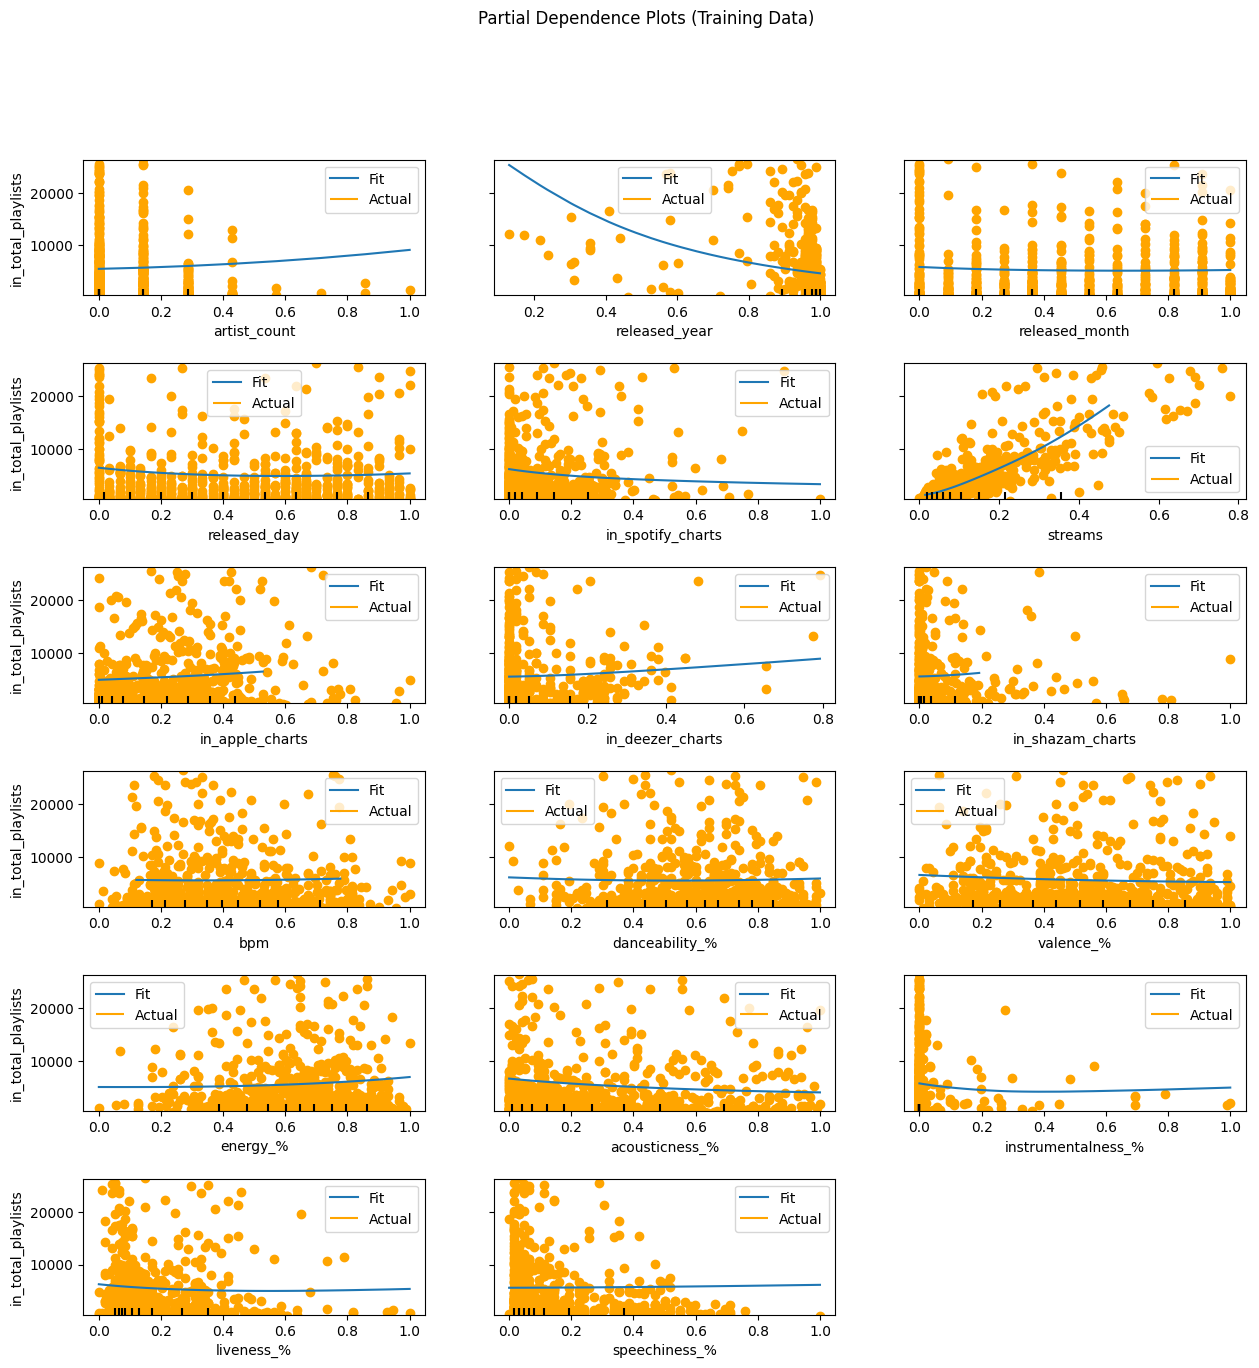

6/6 [==============================] - 0s 801us/step


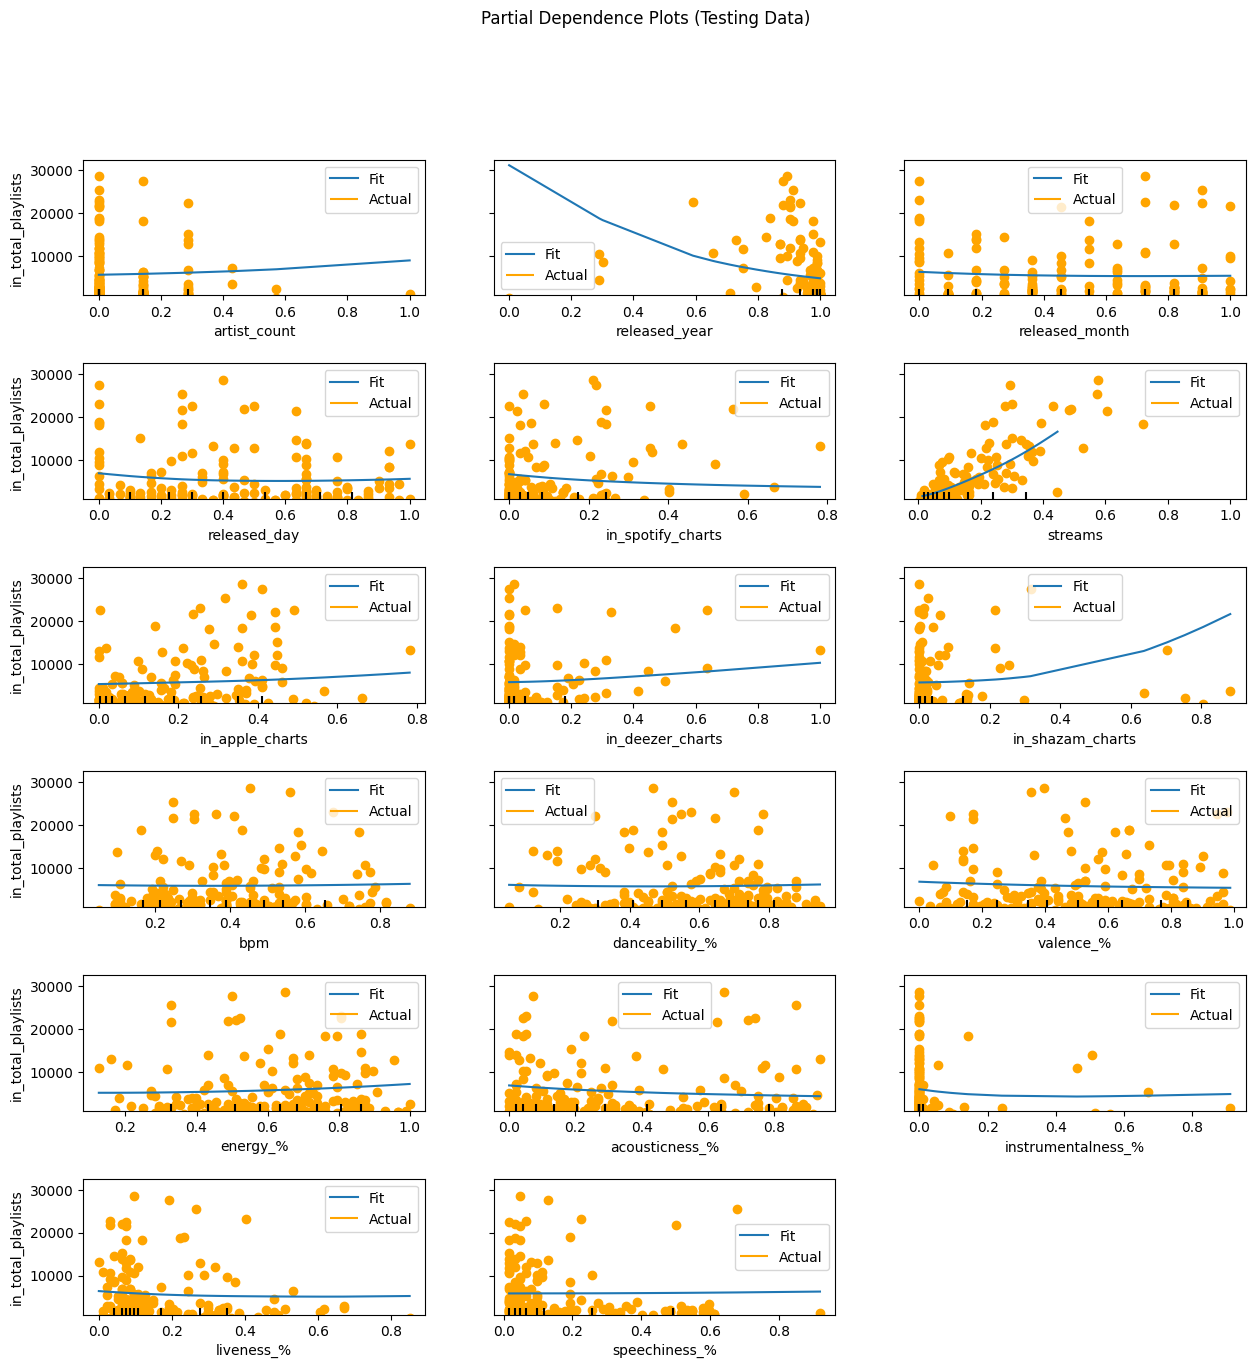

In [438]:
# roughly viewing each input features contribution to the output feature on training data
PDD = PartialDependenceDisplay.from_estimator(kr_model, X_train, features = all_features)

for i in range(len(all_features)):
    PDD.axes_[int(i / 3)][i % 3].scatter(X_train[all_features[i]], y_train, label = 'Actual', color = 'orange')
    PDD.axes_[int(i / 3)][0].set_ylabel('in_total_playlists')
    PDD.axes_[int(i / 3)][i % 3].legend(['Fit', 'Actual'])
    PDD.axes_[int(i / 3)][i % 3].get_legend().legend_handles[1].set_color('orange')

PDD.figure_.set_figwidth(15)
PDD.figure_.set_figheight(15)
PDD.figure_.subplots_adjust(hspace = 0.5)

plt.suptitle('Partial Dependence Plots (Training Data)')
plt.show()

# roughly viewing each input features contribution to the output feature on testing data
PDD = PartialDependenceDisplay.from_estimator(kr_model, X_test, features = all_features)

for i in range(len(all_features)):
    PDD.axes_[int(i / 3)][i % 3].scatter(X_test[all_features[i]], y_test, label = 'Actual', color = 'orange')
    PDD.axes_[int(i / 3)][0].set_ylabel('in_total_playlists')
    PDD.axes_[int(i / 3)][i % 3].legend(['Fit', 'Actual'])
    PDD.axes_[int(i / 3)][i % 3].get_legend().legend_handles[1].set_color('orange')

PDD.figure_.set_figwidth(15)
PDD.figure_.set_figheight(15)
PDD.figure_.subplots_adjust(hspace = 0.5)

plt.suptitle('Partial Dependence Plots (Testing Data)')
plt.show()

## Same Model With K-Fold Cross Validation

In [439]:
#Run Preprocessing Section Before Running This
X = spotify_data[all_features]
X = MinMaxScaler().fit_transform(X) #Min max scaled
y = spotify_data['in_total_playlists']

y = y.to_numpy()

In [440]:
#Largely the same as my own HW2 submission
num_splits = 10
kf = KFold(n_splits=num_splits)

MSEs = []

for i, (train_index, test_index) in enumerate(kf.split(X,y)):

  lr_static = 0.001

  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.95) #Found on the keras.io/api/optimizers page as an example of dynamic leraning rate

  opt = keras.optimizers.Adam(
      learning_rate=lr_static
  )

  input_shape = (17,)
  model = keras.Sequential()
  model.add(keras.Input(shape=input_shape))
  model.add(layers.Dense(17, activation=activationMethod, name="layer1"))
  model.add(layers.Dense(34, activation=activationMethod, name="layer2"))
  model.add(layers.Dense(34, activation=activationMethod, name="layer3"))
  model.add(layers.Dense(17, activation=activationMethod, name="layer4"))
  model.add(layers.Dense(1, activation=activationMethod, name="output"))

  model.compile(optimizer=opt, loss=loss_type, metrics=metrics)
  #Without callbacks for now
  history = model.fit(X[train_index].astype('float'), y[train_index], validation_split=0.1, callbacks = [early_stopping], batch_size=batch_size, epochs=epochs, verbose=0)

  fold_pred_train = model.predict(X[train_index])
  mse_train = mean_squared_error(y[train_index], fold_pred_train)

  fold_pred_test = model.predict(X[test_index])
  mse_test = mean_squared_error(y[test_index], fold_pred_test)

  print("Fold " + str(i) + " Train MSE: " + str(mse_train))
  print("Fold " + str(i) + " Test MSE: " + str(mse_test))

  MSEs.append(mse_test)

print("\nOverall MSE: " + str(np.array(MSEs).mean()))

Restoring model weights from the end of the best epoch: 330.
Epoch 430: early stopping
3/3 [==============================] - 0s 2ms/step
Fold 0 Train MSE: 18798867.939924993
Fold 0 Test MSE: 23445262.755855035
Restoring model weights from the end of the best epoch: 425.
Epoch 525: early stopping
3/3 [==============================] - 0s 1ms/step
Fold 1 Train MSE: 14175901.30110216
Fold 1 Test MSE: 44561677.735688105
Restoring model weights from the end of the best epoch: 295.
Epoch 395: early stopping
3/3 [==============================] - 0s 2ms/step
Fold 2 Train MSE: 18547907.573265873
Fold 2 Test MSE: 12064875.716563439
Restoring model weights from the end of the best epoch: 535.
Epoch 635: early stopping
3/3 [==============================] - 0s 1ms/step
Fold 3 Train MSE: 17671172.571996838
Fold 3 Test MSE: 7236448.801097674
Restoring model weights from the end of the best epoch: 101.
Epoch 201: early stopping
3/3 [==============================] - 0s 2ms/step
Fold 4 Train MSE: 11

# Model 3 - Random Forest Regressor & Extra Trees Regressor

## Random Forest Regressor (Hyperparameter Tuned)

In [441]:
print(spotify_data.columns)
exclude_columns = ["in_spotify_playlists", "in_apple_playlists", "in_deezer_playlists", "in_total_playlists"]
numerical_features = spotify_data.drop(exclude_columns + ['track_name', 'artist(s)_name'], axis=1)
# categorical_features = spotify_data[['track_name', 'artist(s)_name']]

target = spotify_data['in_total_playlists']

X_train, X_test, y_train, y_test = train_test_split(
    pd.concat([numerical_features], axis=1),
    target,
    test_size=0.2,
    random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features.columns),
    ],
    remainder='passthrough'  # columns not specified are left untouched
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': [1.0, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'in_total_playlists'],
      dtype='object')


KeyboardInterrupt: 

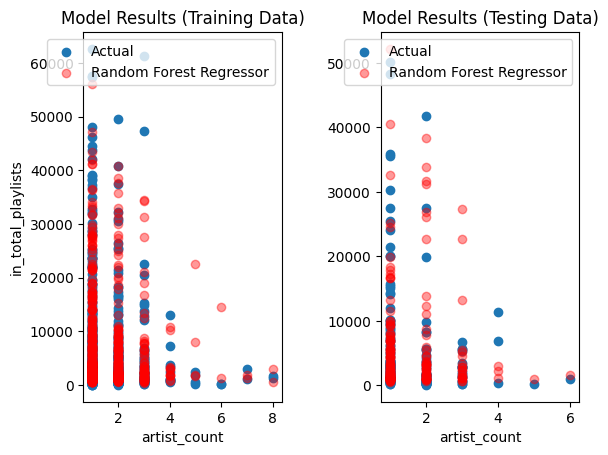

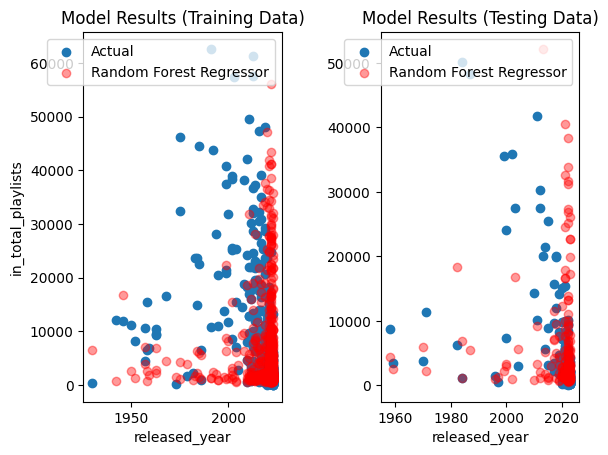

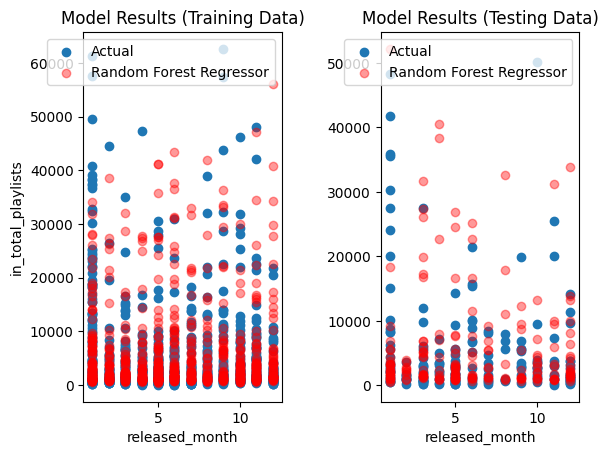

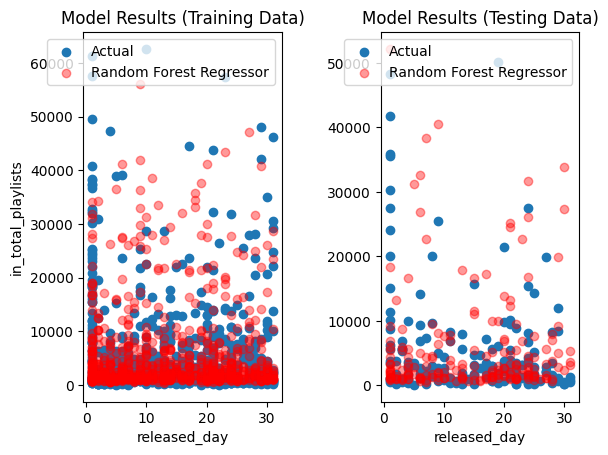

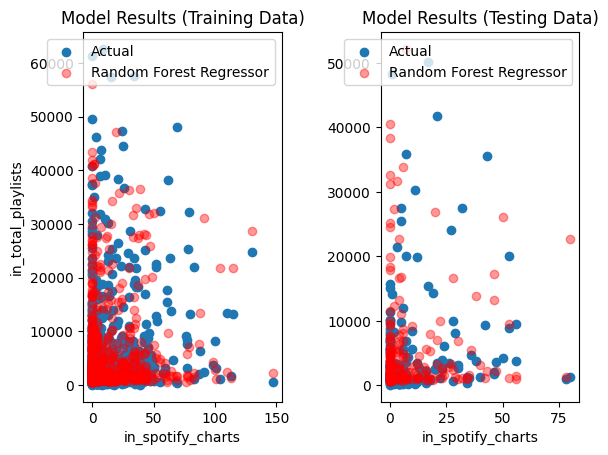

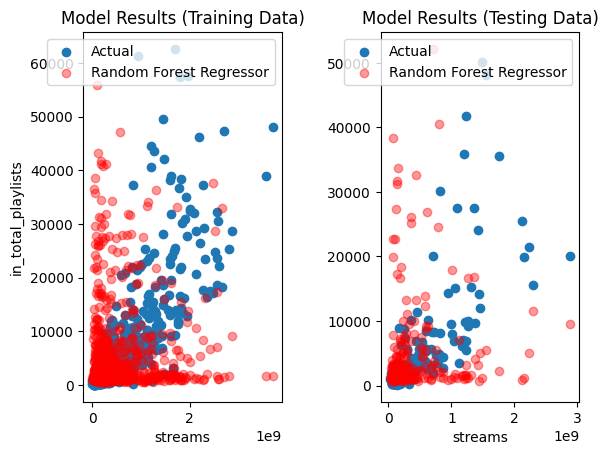

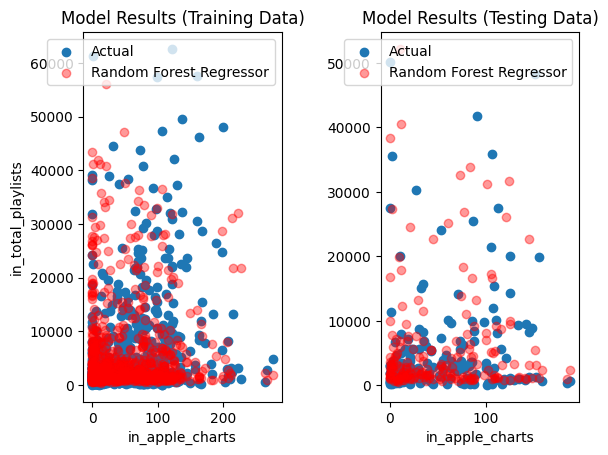

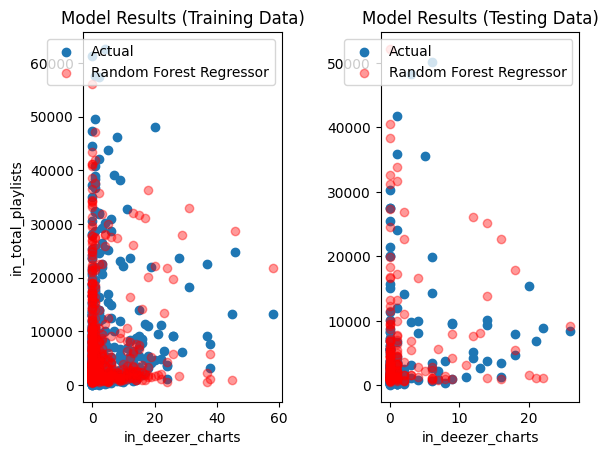

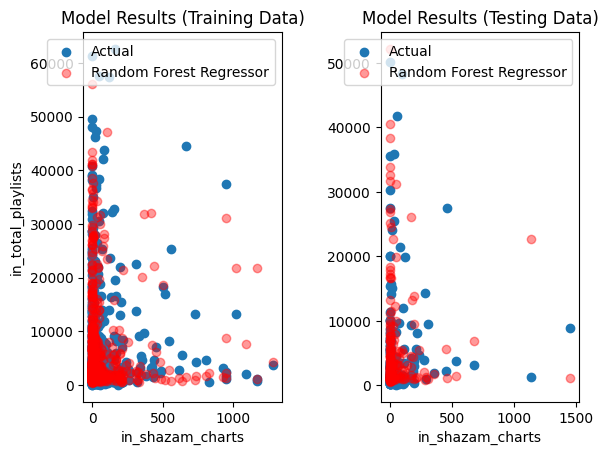

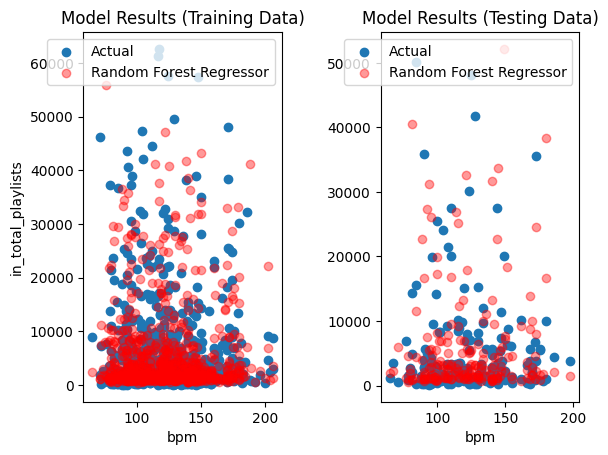

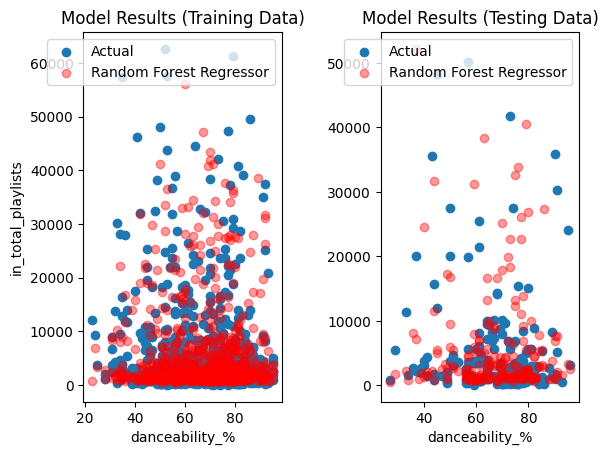

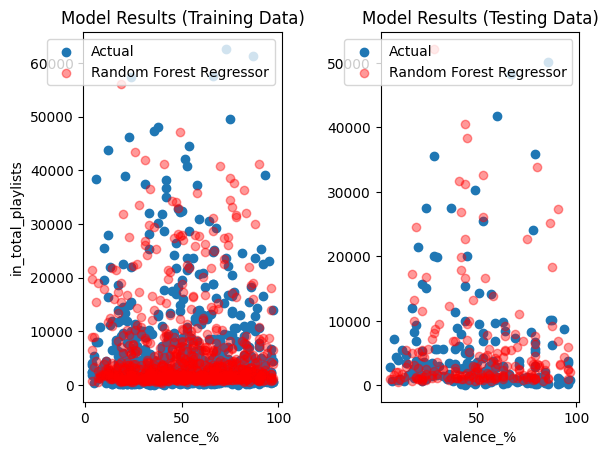

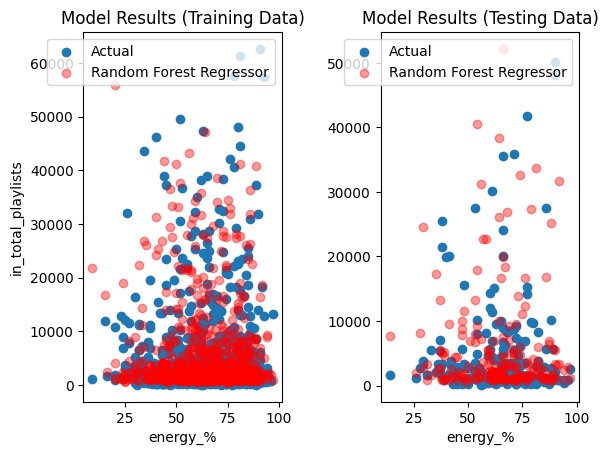

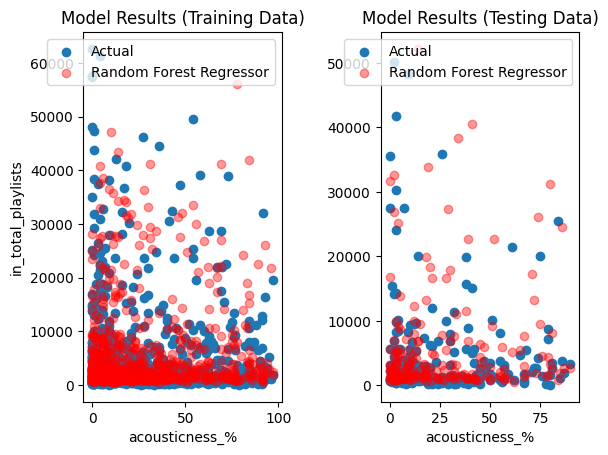

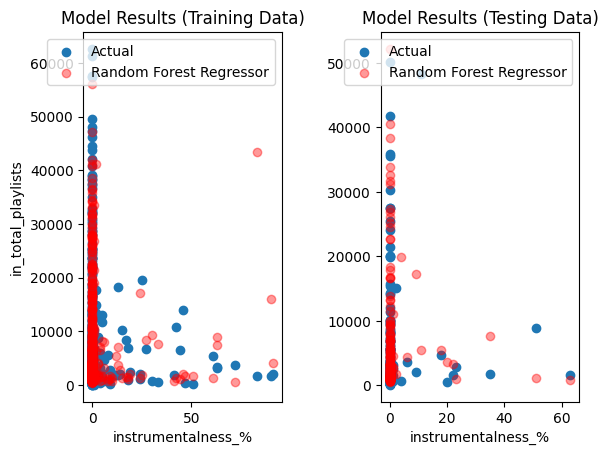

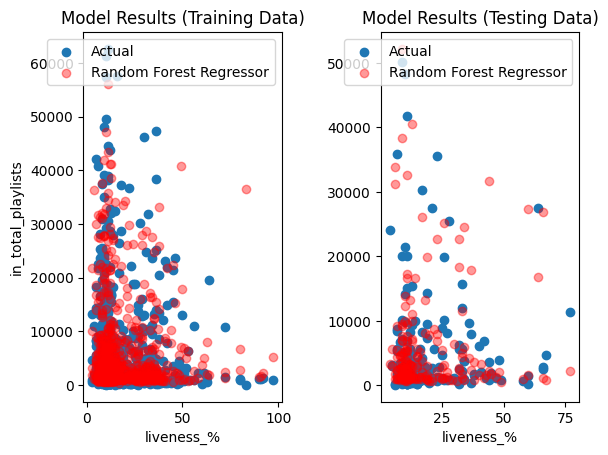

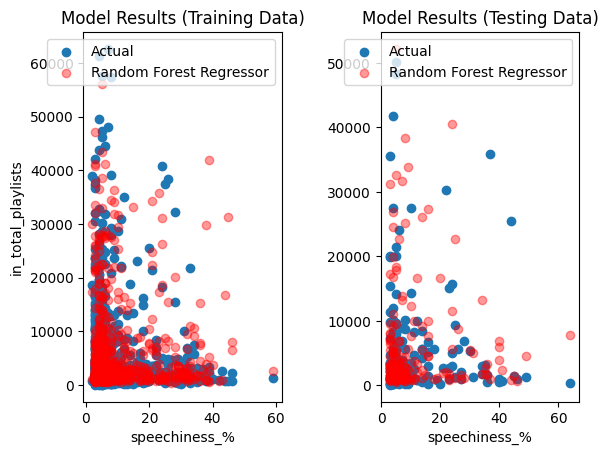

In [ ]:
for feature in all_features:
   fig, axes = plt.subplots(1, 2)

   # ploting training data with the regression
   axes[0].scatter(X_train[feature], y_train, label = 'Actual')
   axes[0].scatter(X_train[feature], yhat_train, color = 'red', label = 'Random Forest Regressor', alpha = 0.4)
   axes[0].set_xlabel(feature)
   axes[0].set_ylabel('in_total_playlists')
   axes[0].set_title('Model Results (Training Data)')
   axes[0].legend()

   # ploting training data with the regression
   axes[1].scatter(X_test[feature], y_test, label = 'Actual')
   axes[1].scatter(X_test[feature], yhat_test, color = 'red', label = 'Random Forest Regressor', alpha = 0.4)
   axes[1].set_xlabel(feature)
   axes[1].set_title('Model Results (Testing Data)')
   axes[1].legend()

   plt.subplots_adjust(wspace = 0.5)

   plt.show()

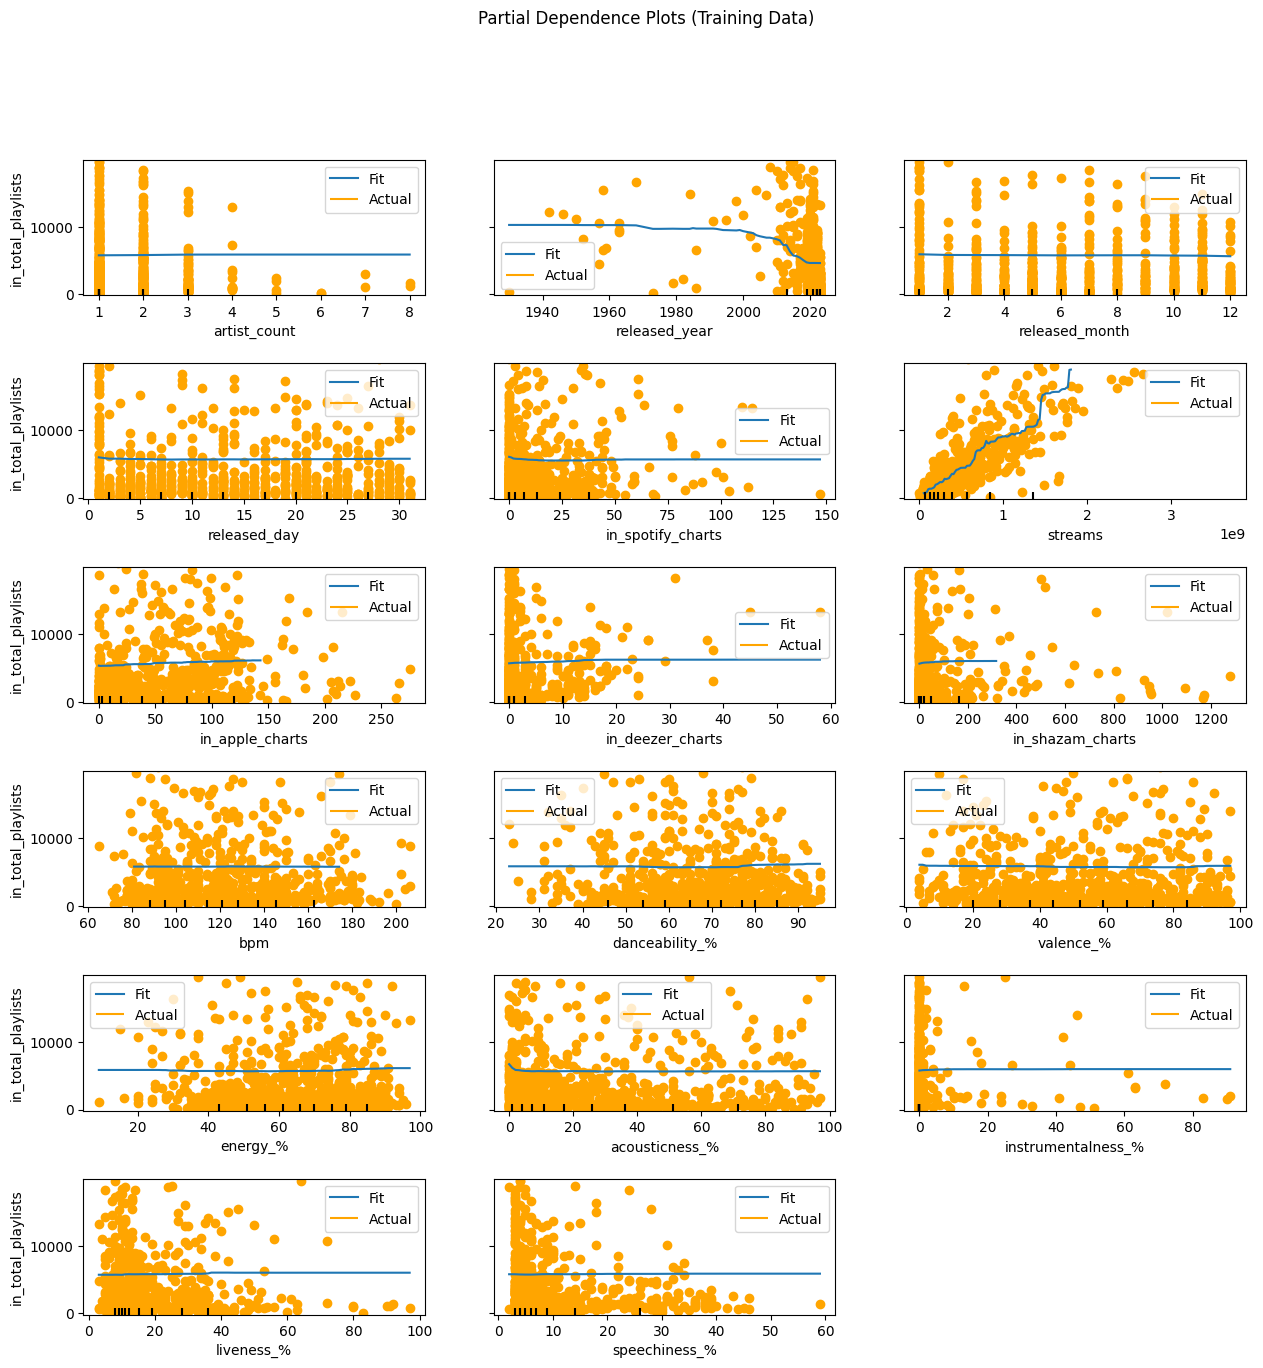

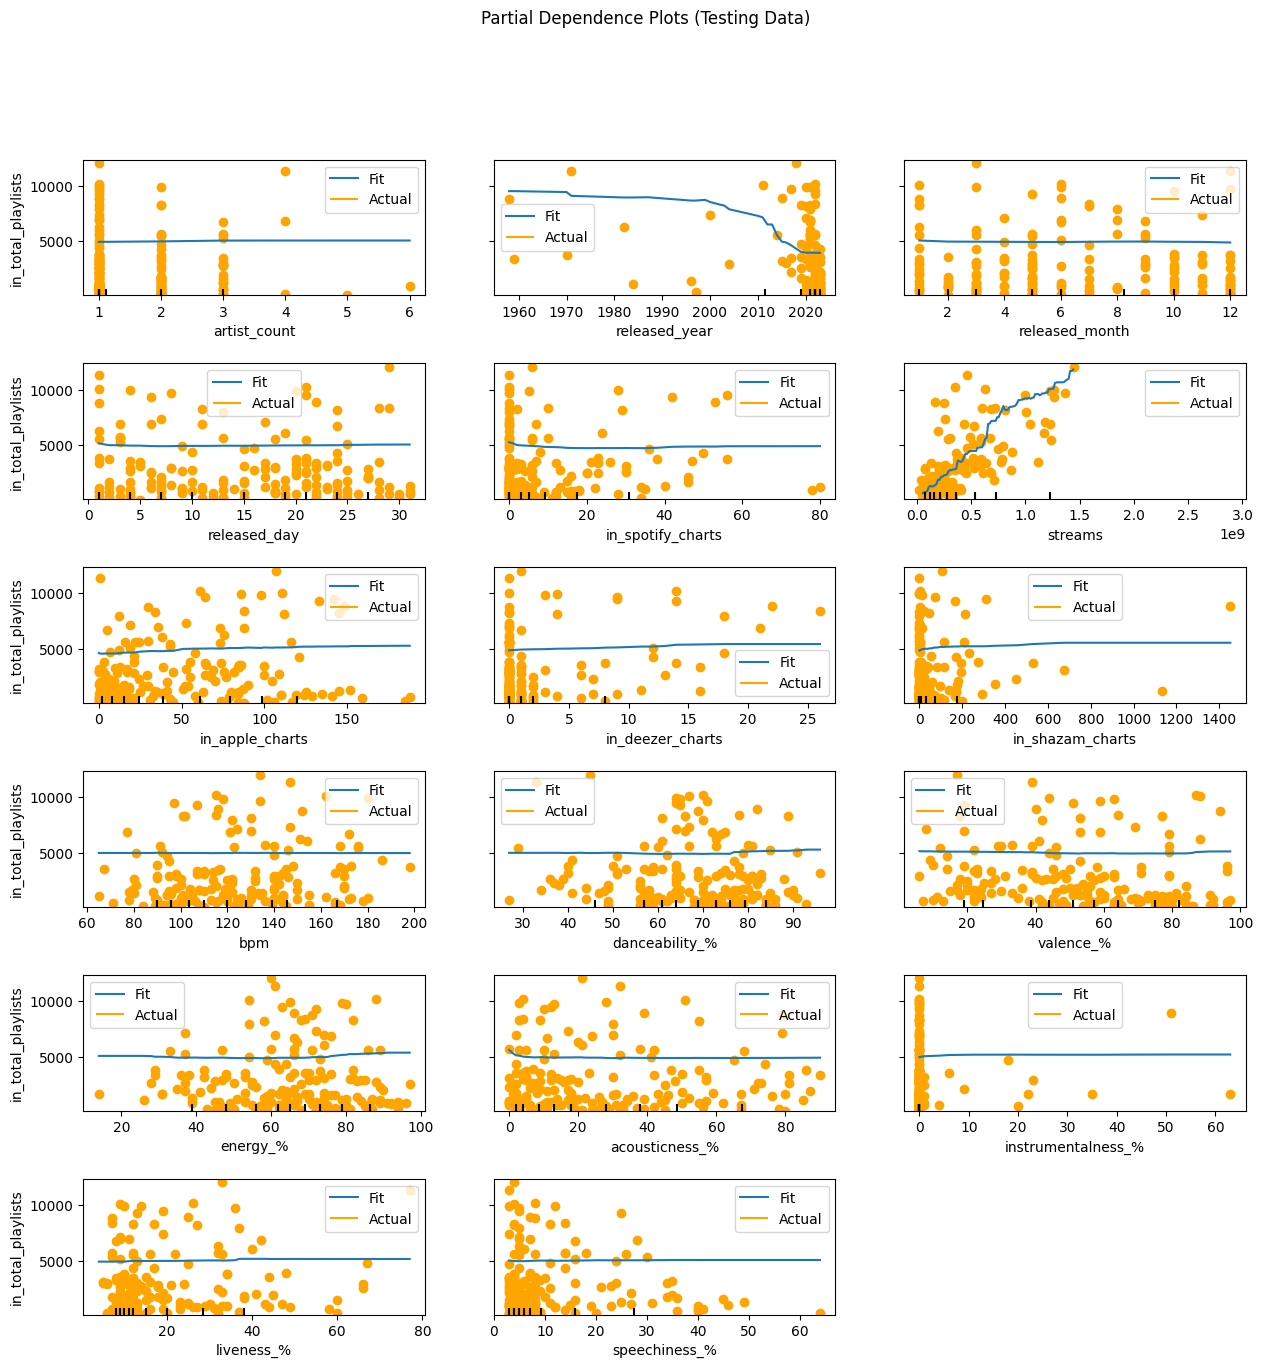

In [ ]:
# roughly viewing each input features contribution to the output feature on training data
PDD = PartialDependenceDisplay.from_estimator(best_model, X_train, features = all_features)

for i in range(len(all_features)):
    PDD.axes_[int(i / 3)][i % 3].scatter(X_train[all_features[i]], y_train, label = 'Actual', color = 'orange')
    PDD.axes_[int(i / 3)][0].set_ylabel('in_total_playlists')
    PDD.axes_[int(i / 3)][i % 3].legend(['Fit', 'Actual'])
    PDD.axes_[int(i / 3)][i % 3].get_legend().legend_handles[1].set_color('orange')

PDD.figure_.set_figwidth(15)
PDD.figure_.set_figheight(15)
PDD.figure_.subplots_adjust(hspace = 0.5)

plt.suptitle('Partial Dependence Plots (Training Data)')
plt.show()

# roughly viewing each input features contribution to the output feature on testing data
PDD = PartialDependenceDisplay.from_estimator(best_model, X_test, features = all_features)

for i in range(len(all_features)):
    PDD.axes_[int(i / 3)][i % 3].scatter(X_test[all_features[i]], y_test, label = 'Actual', color = 'orange')
    PDD.axes_[int(i / 3)][0].set_ylabel('in_total_playlists')
    PDD.axes_[int(i / 3)][i % 3].legend(['Fit', 'Actual'])
    PDD.axes_[int(i / 3)][i % 3].get_legend().legend_handles[1].set_color('orange')

PDD.figure_.set_figwidth(15)
PDD.figure_.set_figheight(15)
PDD.figure_.subplots_adjust(hspace = 0.5)

plt.suptitle('Partial Dependence Plots (Testing Data)')
plt.show()

## Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=21)

model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
yhat_train = model.predict(X_train)

mse = mean_squared_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10363528.627809947


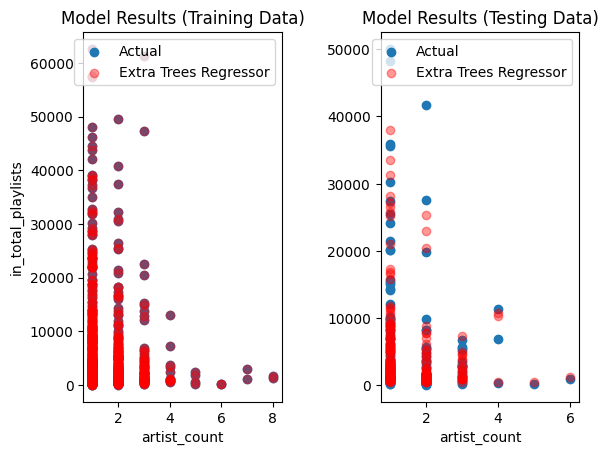

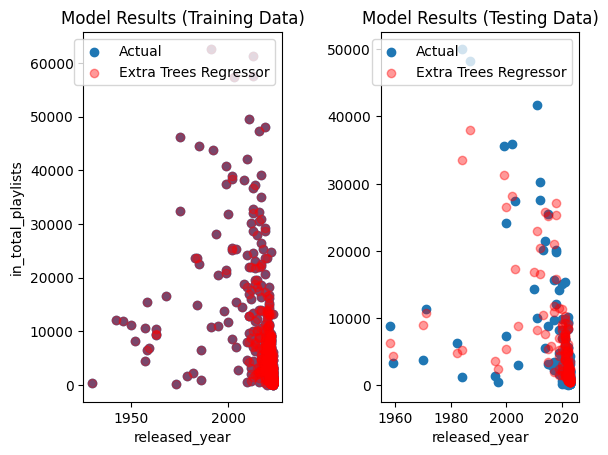

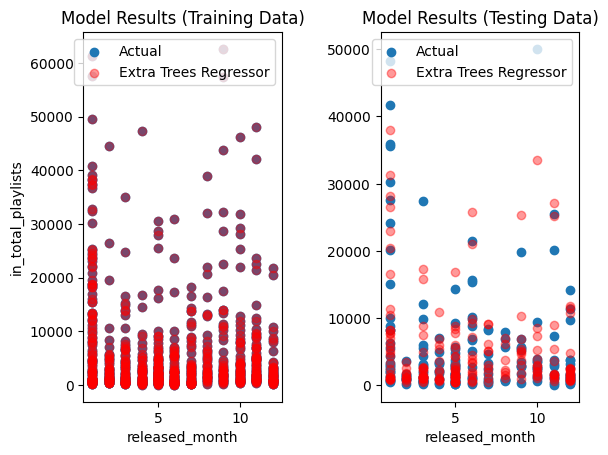

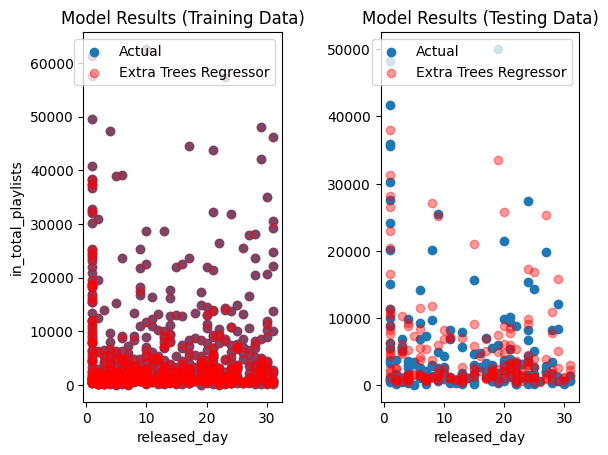

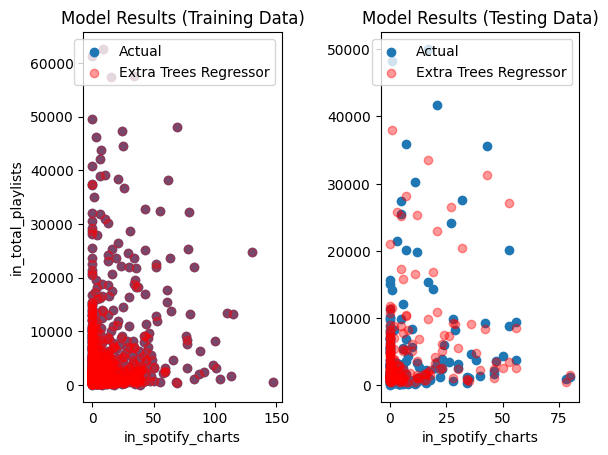

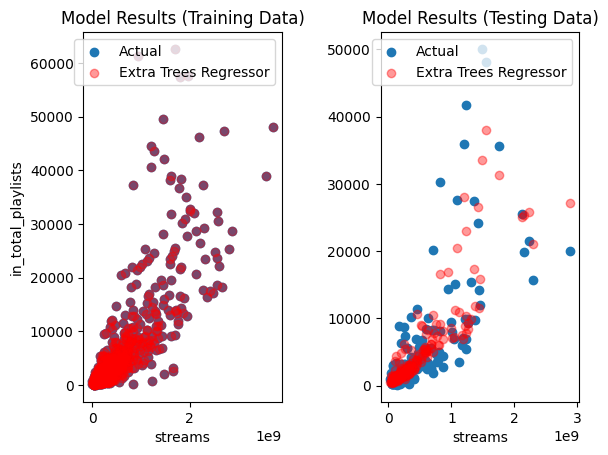

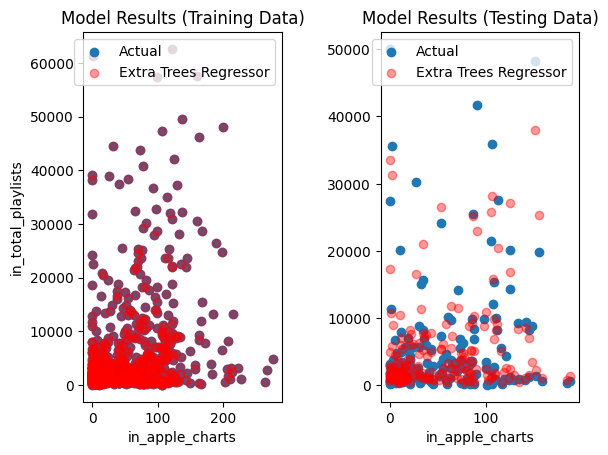

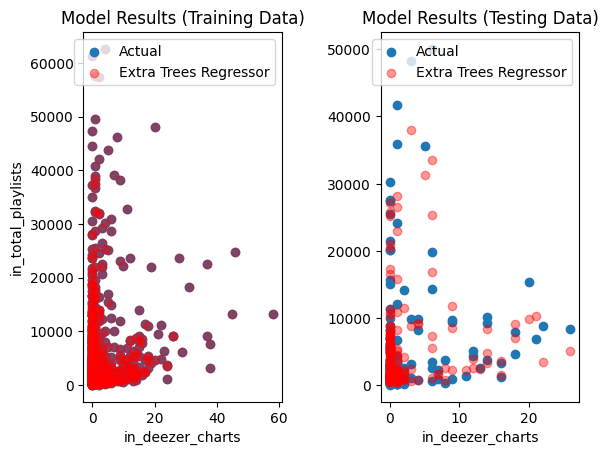

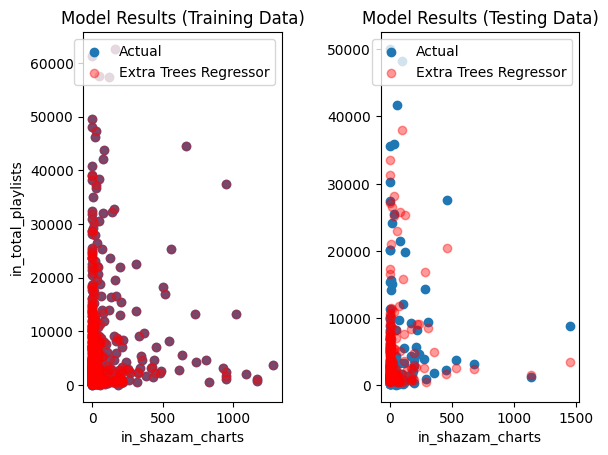

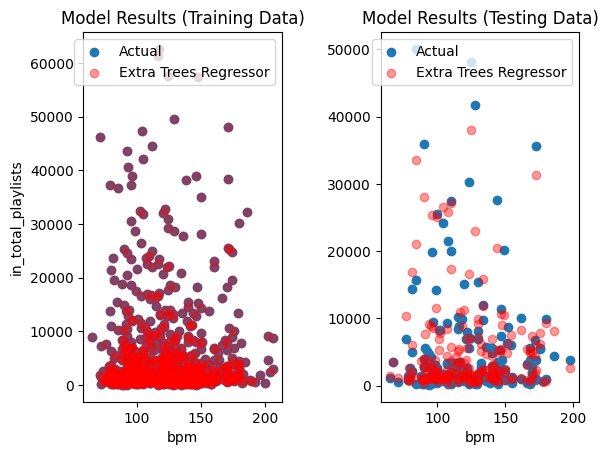

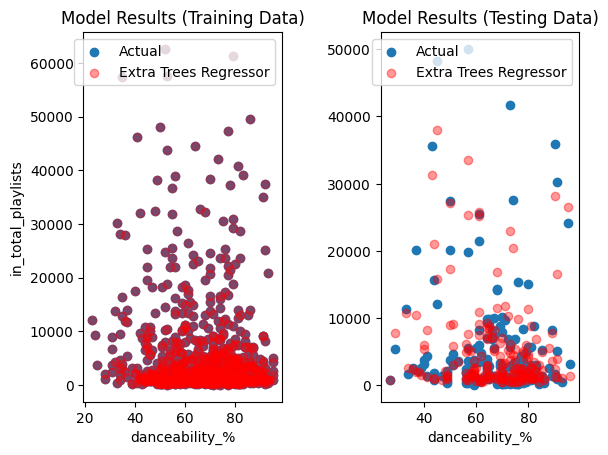

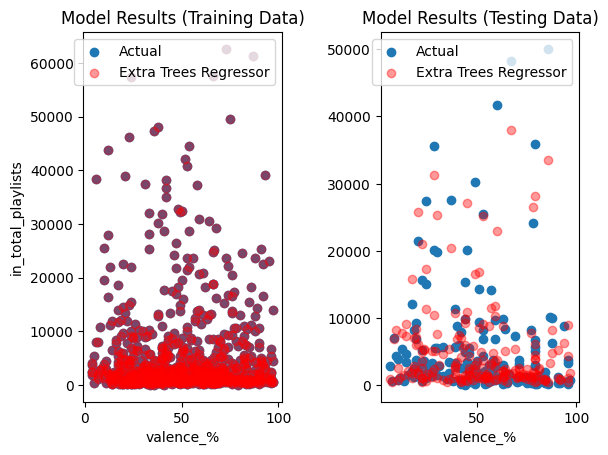

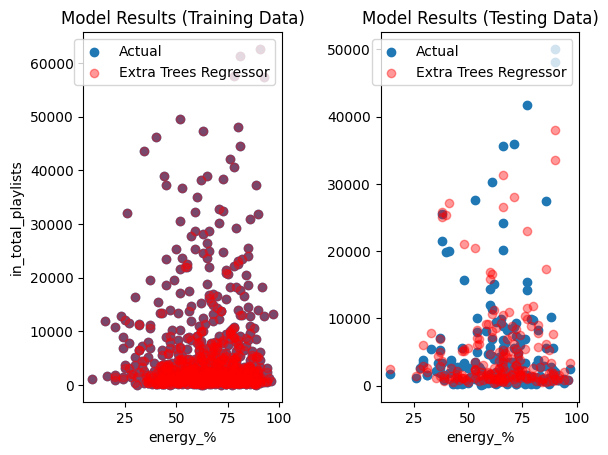

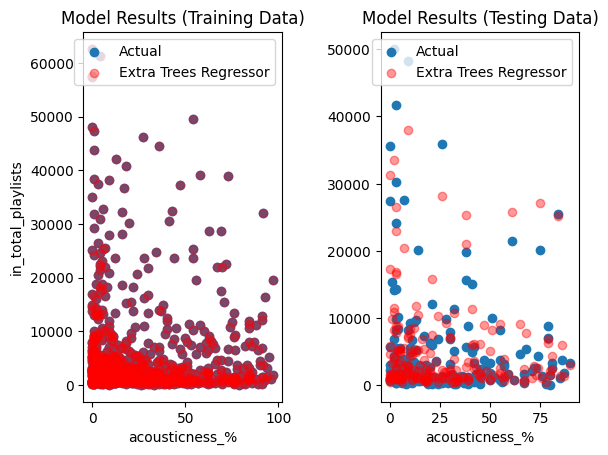

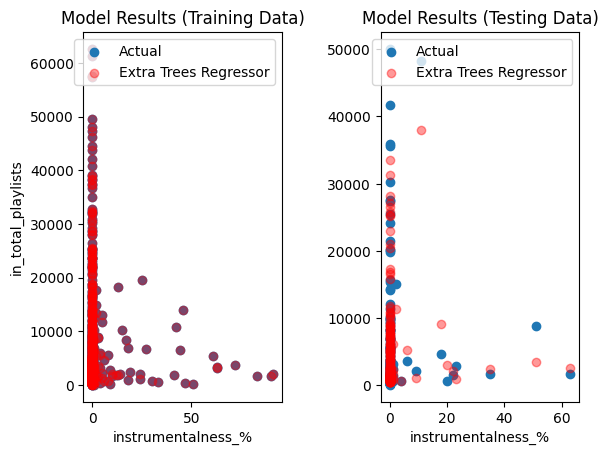

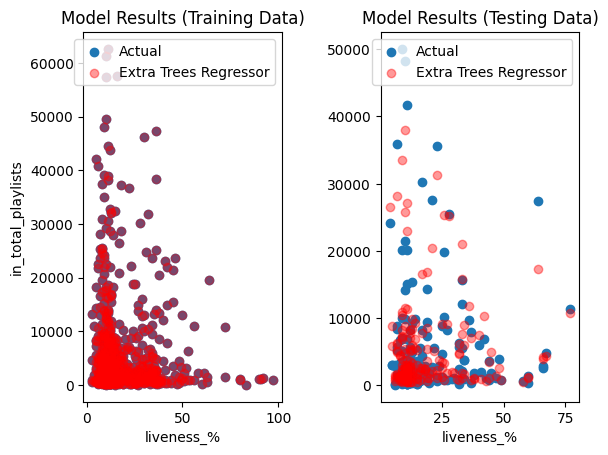

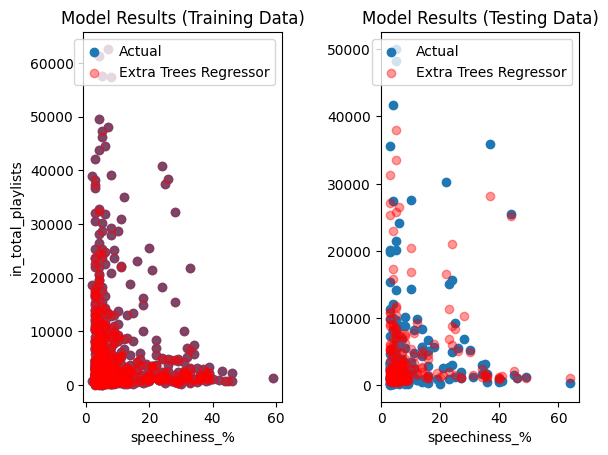

In [ ]:
for feature in all_features:
   fig, axes = plt.subplots(1, 2)

   # ploting training data with the regression
   axes[0].scatter(X_train[feature], y_train, label = 'Actual')
   axes[0].scatter(X_train[feature], yhat_train, color = 'red', label = 'Extra Trees Regressor', alpha = 0.4)
   axes[0].set_xlabel(feature)
   axes[0].set_ylabel('in_total_playlists')
   axes[0].set_title('Model Results (Training Data)')
   axes[0].legend()

   # ploting training data with the regression
   axes[1].scatter(X_test[feature], y_test, label = 'Actual')
   axes[1].scatter(X_test[feature], yhat_test, color = 'red', label = 'Extra Trees Regressor', alpha = 0.4)
   axes[1].set_xlabel(feature)
   axes[1].set_title('Model Results (Testing Data)')
   axes[1].legend()

   plt.subplots_adjust(wspace = 0.5)

   plt.show()

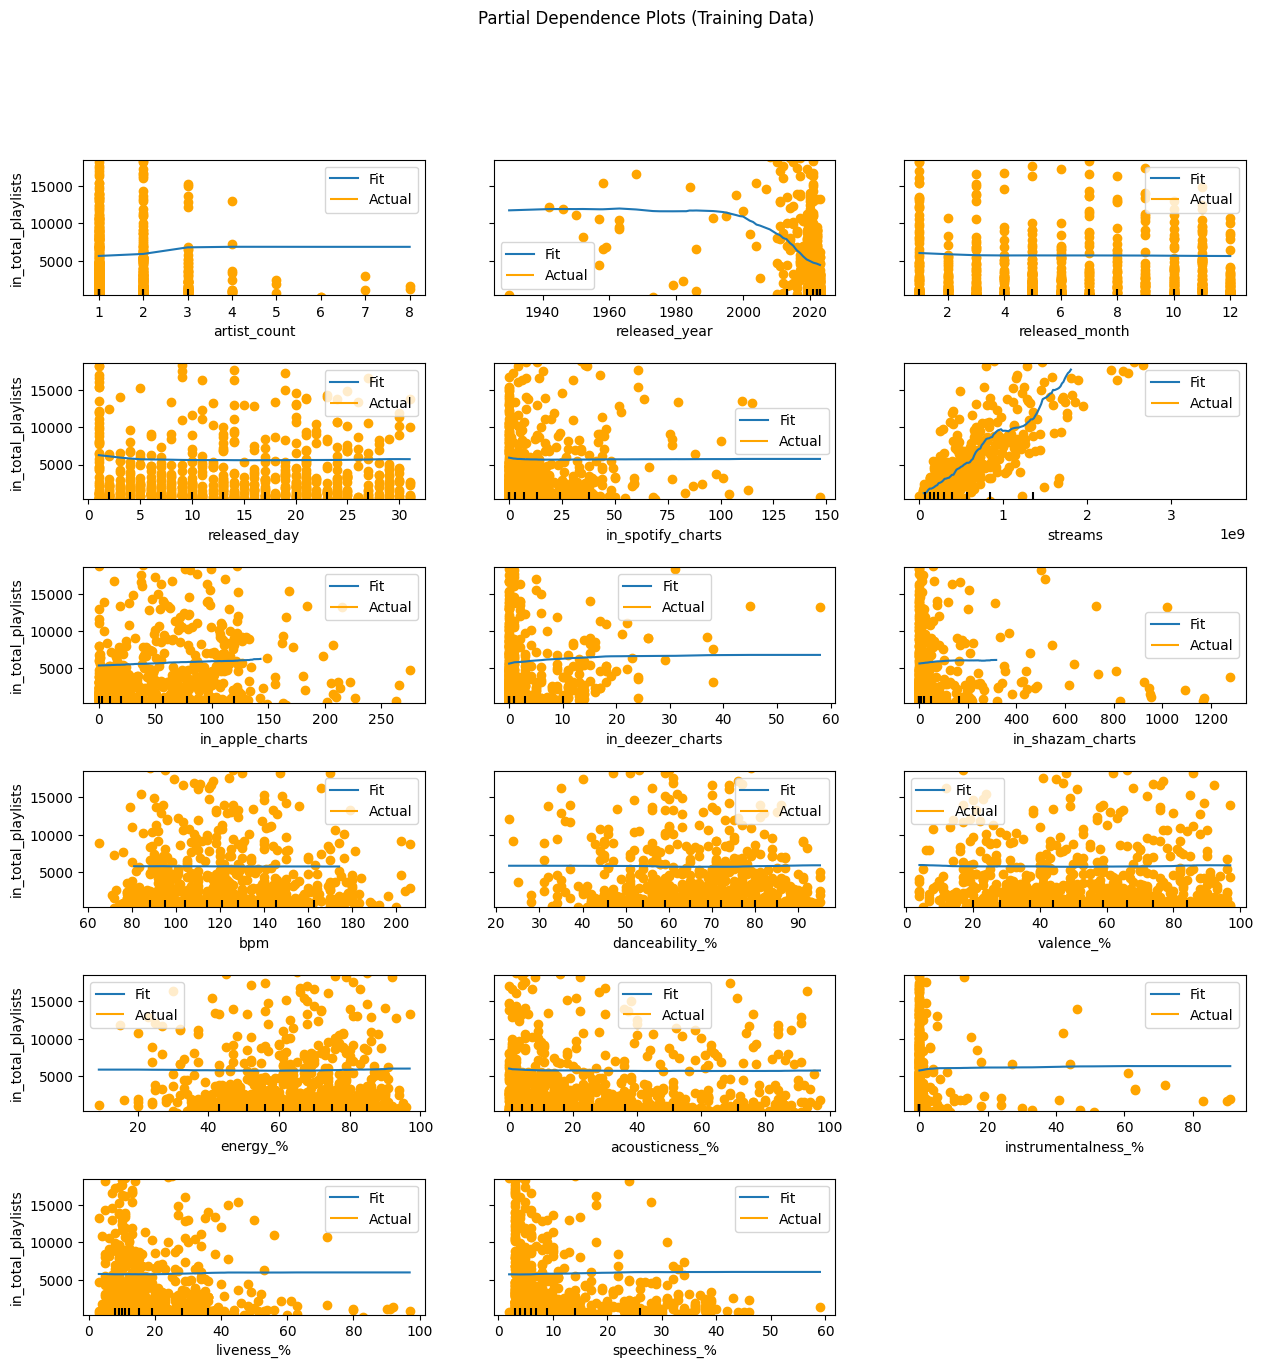

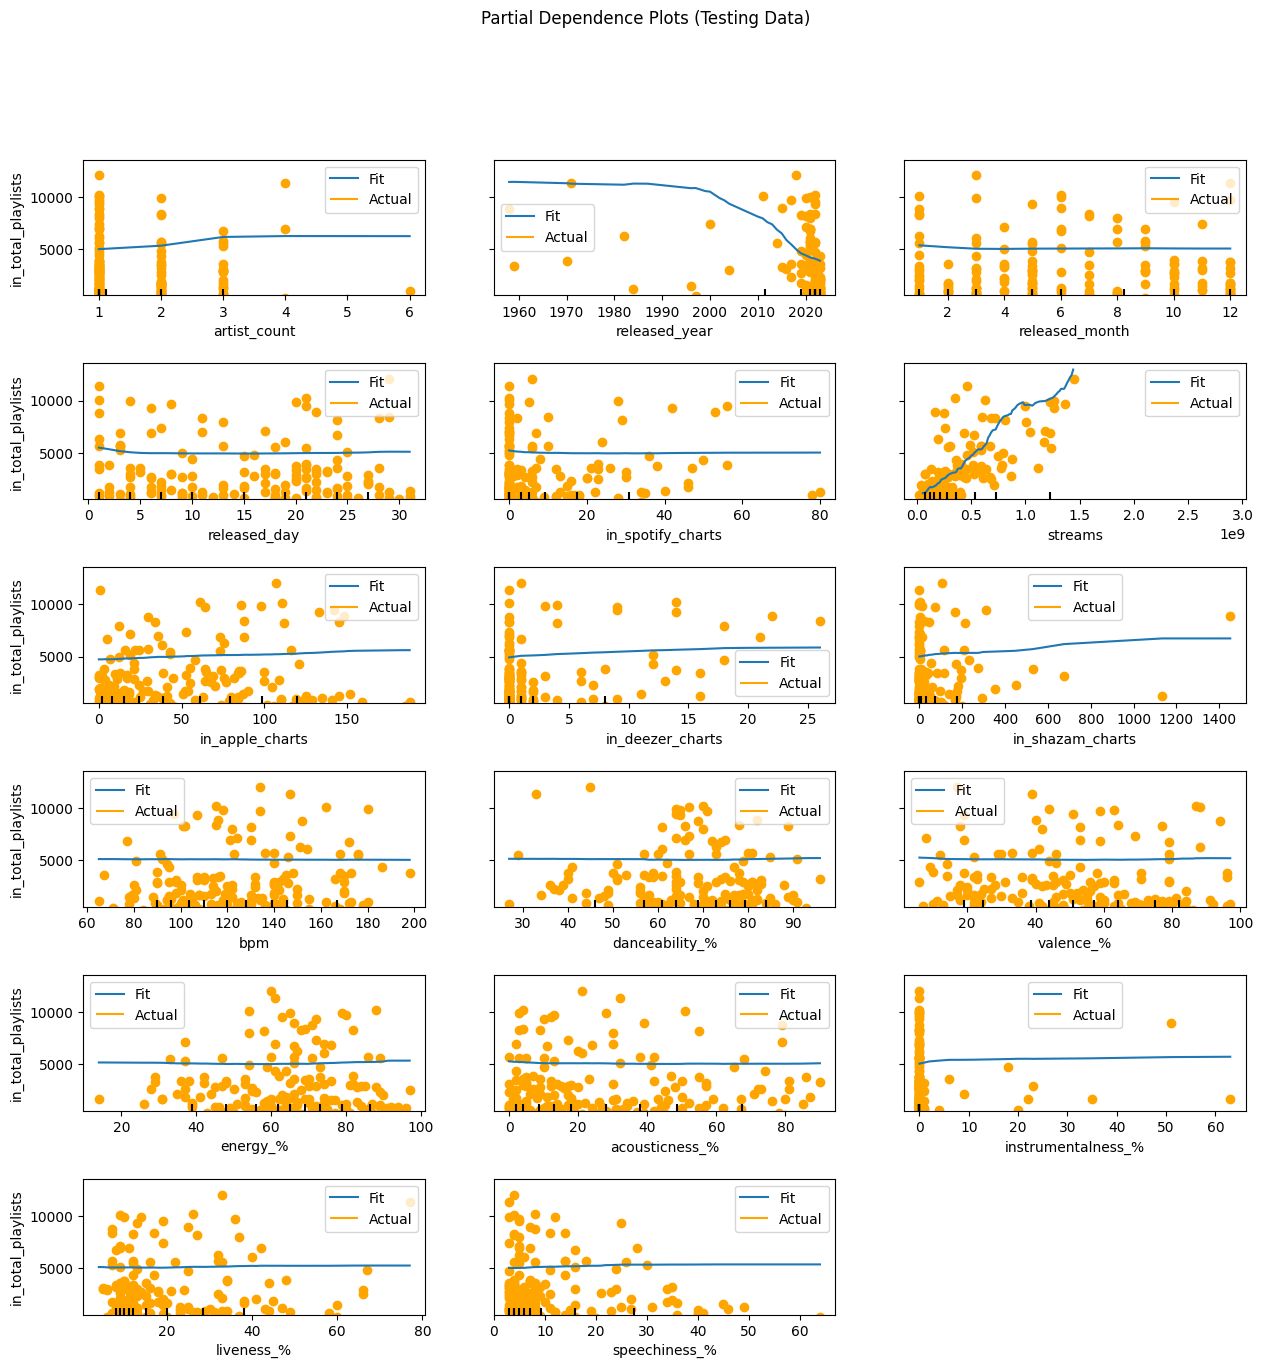

In [ ]:
# roughly viewing each input features contribution to the output feature on training data
PDD = PartialDependenceDisplay.from_estimator(model, X_train, features = all_features)

for i in range(len(all_features)):
    PDD.axes_[int(i / 3)][i % 3].scatter(X_train[all_features[i]], y_train, label = 'Actual', color = 'orange')
    PDD.axes_[int(i / 3)][0].set_ylabel('in_total_playlists')
    PDD.axes_[int(i / 3)][i % 3].legend(['Fit', 'Actual'])
    PDD.axes_[int(i / 3)][i % 3].get_legend().legend_handles[1].set_color('orange')

PDD.figure_.set_figwidth(15)
PDD.figure_.set_figheight(15)
PDD.figure_.subplots_adjust(hspace = 0.5)

plt.suptitle('Partial Dependence Plots (Training Data)')
plt.show()

# roughly viewing each input features contribution to the output feature on testing data
PDD = PartialDependenceDisplay.from_estimator(model, X_test, features = all_features)

for i in range(len(all_features)):
    PDD.axes_[int(i / 3)][i % 3].scatter(X_test[all_features[i]], y_test, label = 'Actual', color = 'orange')
    PDD.axes_[int(i / 3)][0].set_ylabel('in_total_playlists')
    PDD.axes_[int(i / 3)][i % 3].legend(['Fit', 'Actual'])
    PDD.axes_[int(i / 3)][i % 3].get_legend().legend_handles[1].set_color('orange')

PDD.figure_.set_figwidth(15)
PDD.figure_.set_figheight(15)
PDD.figure_.subplots_adjust(hspace = 0.5)

plt.suptitle('Partial Dependence Plots (Testing Data)')
plt.show()